In [1]:
from PyQt5 import QtCore, QtGui, QtWidgets
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

In [2]:
data = []
labels = []
classes = 43
cur_path = os.getcwd() #To get current directory

In [3]:
classs = { 1:"Speed limit (20km/h)",
    2:"Speed limit (30km/h)",
    3:"Speed limit (50km/h)",
    4:"Speed limit (60km/h)",
    5:"Speed limit (70km/h)",
    6:"Speed limit (80km/h)",
    7:"End of speed limit (80km/h)",
    8:"Speed limit (100km/h)",
    9:"Speed limit (120km/h)",
    10:"No passing",
    11:"No passing veh over 3.5 tons",
    12:"Right-of-way at intersection",
    13:"Priority road",
    14:"Yield",
    15:"Stop",
    16:"No vehicles",
    17:"Veh > 3.5 tons prohibited",
    18:"No entry",
    19:"General caution",
    20:"Dangerous curve left",
    21:"Dangerous curve right",
    22:"Double curve",
    23:"Bumpy road",
    24:"Slippery road",
    25:"Road narrows on the right",
    26:"Road work",
    27:"Traffic signals",
    28:"Pedestrians",
    29:"Children crossing",
    30:"Bicycles crossing",
    31:"Beware of ice/snow",
    32:"Wild animals crossing",
    33:"End speed + passing limits",
    34:"Turn right ahead",
    35:"Turn left ahead",
    36:"Ahead only",
    37:"Go straight or right",
    38:"Go straight or left",
    39:"Keep right",
    40:"Keep left",
    41:"Roundabout mandatory",
    42:"End of no passing",
    43:"End no passing veh > 3.5 tons" }

In [4]:
#Retrieving the images and their labels
print("Obtaining Images & its Labels..............")
for i in range(classes):
    path = os.path.join(cur_path,'dataset/Train/',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
            print("{0} Loaded".format(a))
        except:
            print("Error loading image")
print("Dataset Loaded")

Obtaining Images & its Labels..............
00000_00000_00000.png Loaded
00000_00000_00001.png Loaded
00000_00000_00002.png Loaded
00000_00000_00003.png Loaded
00000_00000_00004.png Loaded
00000_00000_00005.png Loaded
00000_00000_00006.png Loaded
00000_00000_00007.png Loaded
00000_00000_00008.png Loaded
00000_00000_00009.png Loaded
00000_00000_00010.png Loaded
00000_00000_00011.png Loaded
00000_00000_00012.png Loaded
00000_00000_00013.png Loaded
00000_00000_00014.png Loaded
00000_00000_00015.png Loaded
00000_00000_00016.png Loaded
00000_00000_00017.png Loaded
00000_00000_00018.png Loaded
00000_00000_00019.png Loaded
00000_00000_00020.png Loaded
00000_00000_00021.png Loaded
00000_00000_00022.png Loaded
00000_00000_00023.png Loaded
00000_00000_00024.png Loaded
00000_00000_00025.png Loaded
00000_00000_00026.png Loaded
00000_00000_00027.png Loaded
00000_00000_00028.png Loaded
00000_00000_00029.png Loaded
00000_00001_00000.png Loaded
00000_00001_00001.png Loaded
00000_00001_00002.png Loaded

00001_00002_00018.png Loaded
00001_00002_00019.png Loaded
00001_00002_00020.png Loaded
00001_00002_00021.png Loaded
00001_00002_00022.png Loaded
00001_00002_00023.png Loaded
00001_00002_00024.png Loaded
00001_00002_00025.png Loaded
00001_00002_00026.png Loaded
00001_00002_00027.png Loaded
00001_00002_00028.png Loaded
00001_00002_00029.png Loaded
00001_00003_00000.png Loaded
00001_00003_00001.png Loaded
00001_00003_00002.png Loaded
00001_00003_00003.png Loaded
00001_00003_00004.png Loaded
00001_00003_00005.png Loaded
00001_00003_00006.png Loaded
00001_00003_00007.png Loaded
00001_00003_00008.png Loaded
00001_00003_00009.png Loaded
00001_00003_00010.png Loaded
00001_00003_00011.png Loaded
00001_00003_00012.png Loaded
00001_00003_00013.png Loaded
00001_00003_00014.png Loaded
00001_00003_00015.png Loaded
00001_00003_00016.png Loaded
00001_00003_00017.png Loaded
00001_00003_00018.png Loaded
00001_00003_00019.png Loaded
00001_00003_00020.png Loaded
00001_00003_00021.png Loaded
00001_00003_00

00001_00013_00020.png Loaded
00001_00013_00021.png Loaded
00001_00013_00022.png Loaded
00001_00013_00023.png Loaded
00001_00013_00024.png Loaded
00001_00013_00025.png Loaded
00001_00013_00026.png Loaded
00001_00013_00027.png Loaded
00001_00013_00028.png Loaded
00001_00013_00029.png Loaded
00001_00014_00000.png Loaded
00001_00014_00001.png Loaded
00001_00014_00002.png Loaded
00001_00014_00003.png Loaded
00001_00014_00004.png Loaded
00001_00014_00005.png Loaded
00001_00014_00006.png Loaded
00001_00014_00007.png Loaded
00001_00014_00008.png Loaded
00001_00014_00009.png Loaded
00001_00014_00010.png Loaded
00001_00014_00011.png Loaded
00001_00014_00012.png Loaded
00001_00014_00013.png Loaded
00001_00014_00014.png Loaded
00001_00014_00015.png Loaded
00001_00014_00016.png Loaded
00001_00014_00017.png Loaded
00001_00014_00018.png Loaded
00001_00014_00019.png Loaded
00001_00014_00020.png Loaded
00001_00014_00021.png Loaded
00001_00014_00022.png Loaded
00001_00014_00023.png Loaded
00001_00014_00

00001_00024_00019.png Loaded
00001_00024_00020.png Loaded
00001_00024_00021.png Loaded
00001_00024_00022.png Loaded
00001_00024_00023.png Loaded
00001_00024_00024.png Loaded
00001_00024_00025.png Loaded
00001_00024_00026.png Loaded
00001_00024_00027.png Loaded
00001_00024_00028.png Loaded
00001_00024_00029.png Loaded
00001_00025_00000.png Loaded
00001_00025_00001.png Loaded
00001_00025_00002.png Loaded
00001_00025_00003.png Loaded
00001_00025_00004.png Loaded
00001_00025_00005.png Loaded
00001_00025_00006.png Loaded
00001_00025_00007.png Loaded
00001_00025_00008.png Loaded
00001_00025_00009.png Loaded
00001_00025_00010.png Loaded
00001_00025_00011.png Loaded
00001_00025_00012.png Loaded
00001_00025_00013.png Loaded
00001_00025_00014.png Loaded
00001_00025_00015.png Loaded
00001_00025_00016.png Loaded
00001_00025_00017.png Loaded
00001_00025_00018.png Loaded
00001_00025_00019.png Loaded
00001_00025_00020.png Loaded
00001_00025_00021.png Loaded
00001_00025_00022.png Loaded
00001_00025_00

00001_00036_00003.png Loaded
00001_00036_00004.png Loaded
00001_00036_00005.png Loaded
00001_00036_00006.png Loaded
00001_00036_00007.png Loaded
00001_00036_00008.png Loaded
00001_00036_00009.png Loaded
00001_00036_00010.png Loaded
00001_00036_00011.png Loaded
00001_00036_00012.png Loaded
00001_00036_00013.png Loaded
00001_00036_00014.png Loaded
00001_00036_00015.png Loaded
00001_00036_00016.png Loaded
00001_00036_00017.png Loaded
00001_00036_00018.png Loaded
00001_00036_00019.png Loaded
00001_00036_00020.png Loaded
00001_00036_00021.png Loaded
00001_00036_00022.png Loaded
00001_00036_00023.png Loaded
00001_00036_00024.png Loaded
00001_00036_00025.png Loaded
00001_00036_00026.png Loaded
00001_00036_00027.png Loaded
00001_00036_00028.png Loaded
00001_00036_00029.png Loaded
00001_00037_00000.png Loaded
00001_00037_00001.png Loaded
00001_00037_00002.png Loaded
00001_00037_00003.png Loaded
00001_00037_00004.png Loaded
00001_00037_00005.png Loaded
00001_00037_00006.png Loaded
00001_00037_00

00001_00046_00023.png Loaded
00001_00046_00024.png Loaded
00001_00046_00025.png Loaded
00001_00046_00026.png Loaded
00001_00046_00027.png Loaded
00001_00046_00028.png Loaded
00001_00046_00029.png Loaded
00001_00047_00000.png Loaded
00001_00047_00001.png Loaded
00001_00047_00002.png Loaded
00001_00047_00003.png Loaded
00001_00047_00004.png Loaded
00001_00047_00005.png Loaded
00001_00047_00006.png Loaded
00001_00047_00007.png Loaded
00001_00047_00008.png Loaded
00001_00047_00009.png Loaded
00001_00047_00010.png Loaded
00001_00047_00011.png Loaded
00001_00047_00012.png Loaded
00001_00047_00013.png Loaded
00001_00047_00014.png Loaded
00001_00047_00015.png Loaded
00001_00047_00016.png Loaded
00001_00047_00017.png Loaded
00001_00047_00018.png Loaded
00001_00047_00019.png Loaded
00001_00047_00020.png Loaded
00001_00047_00021.png Loaded
00001_00047_00022.png Loaded
00001_00047_00023.png Loaded
00001_00047_00024.png Loaded
00001_00047_00025.png Loaded
00001_00047_00026.png Loaded
00001_00047_00

00001_00057_00009.png Loaded
00001_00057_00010.png Loaded
00001_00057_00011.png Loaded
00001_00057_00012.png Loaded
00001_00057_00013.png Loaded
00001_00057_00014.png Loaded
00001_00057_00015.png Loaded
00001_00057_00016.png Loaded
00001_00057_00017.png Loaded
00001_00057_00018.png Loaded
00001_00057_00019.png Loaded
00001_00057_00020.png Loaded
00001_00057_00021.png Loaded
00001_00057_00022.png Loaded
00001_00057_00023.png Loaded
00001_00057_00024.png Loaded
00001_00057_00025.png Loaded
00001_00057_00026.png Loaded
00001_00057_00027.png Loaded
00001_00057_00028.png Loaded
00001_00057_00029.png Loaded
00001_00058_00000.png Loaded
00001_00058_00001.png Loaded
00001_00058_00002.png Loaded
00001_00058_00003.png Loaded
00001_00058_00004.png Loaded
00001_00058_00005.png Loaded
00001_00058_00006.png Loaded
00001_00058_00007.png Loaded
00001_00058_00008.png Loaded
00001_00058_00009.png Loaded
00001_00058_00010.png Loaded
00001_00058_00011.png Loaded
00001_00058_00012.png Loaded
00001_00058_00

00001_00068_00014.png Loaded
00001_00068_00015.png Loaded
00001_00068_00016.png Loaded
00001_00068_00017.png Loaded
00001_00068_00018.png Loaded
00001_00068_00019.png Loaded
00001_00068_00020.png Loaded
00001_00068_00021.png Loaded
00001_00068_00022.png Loaded
00001_00068_00023.png Loaded
00001_00068_00024.png Loaded
00001_00068_00025.png Loaded
00001_00068_00026.png Loaded
00001_00068_00027.png Loaded
00001_00068_00028.png Loaded
00001_00068_00029.png Loaded
00001_00069_00000.png Loaded
00001_00069_00001.png Loaded
00001_00069_00002.png Loaded
00001_00069_00003.png Loaded
00001_00069_00004.png Loaded
00001_00069_00005.png Loaded
00001_00069_00006.png Loaded
00001_00069_00007.png Loaded
00001_00069_00008.png Loaded
00001_00069_00009.png Loaded
00001_00069_00010.png Loaded
00001_00069_00011.png Loaded
00001_00069_00012.png Loaded
00001_00069_00013.png Loaded
00001_00069_00014.png Loaded
00001_00069_00015.png Loaded
00001_00069_00016.png Loaded
00001_00069_00017.png Loaded
00001_00069_00

00002_00005_00011.png Loaded
00002_00005_00012.png Loaded
00002_00005_00013.png Loaded
00002_00005_00014.png Loaded
00002_00005_00015.png Loaded
00002_00005_00016.png Loaded
00002_00005_00017.png Loaded
00002_00005_00018.png Loaded
00002_00005_00019.png Loaded
00002_00005_00020.png Loaded
00002_00005_00021.png Loaded
00002_00005_00022.png Loaded
00002_00005_00023.png Loaded
00002_00005_00024.png Loaded
00002_00005_00025.png Loaded
00002_00005_00026.png Loaded
00002_00005_00027.png Loaded
00002_00005_00028.png Loaded
00002_00005_00029.png Loaded
00002_00006_00000.png Loaded
00002_00006_00001.png Loaded
00002_00006_00002.png Loaded
00002_00006_00003.png Loaded
00002_00006_00004.png Loaded
00002_00006_00005.png Loaded
00002_00006_00006.png Loaded
00002_00006_00007.png Loaded
00002_00006_00008.png Loaded
00002_00006_00009.png Loaded
00002_00006_00010.png Loaded
00002_00006_00011.png Loaded
00002_00006_00012.png Loaded
00002_00006_00013.png Loaded
00002_00006_00014.png Loaded
00002_00006_00

00002_00016_00014.png Loaded
00002_00016_00015.png Loaded
00002_00016_00016.png Loaded
00002_00016_00017.png Loaded
00002_00016_00018.png Loaded
00002_00016_00019.png Loaded
00002_00016_00020.png Loaded
00002_00016_00021.png Loaded
00002_00016_00022.png Loaded
00002_00016_00023.png Loaded
00002_00016_00024.png Loaded
00002_00016_00025.png Loaded
00002_00016_00026.png Loaded
00002_00016_00027.png Loaded
00002_00016_00028.png Loaded
00002_00016_00029.png Loaded
00002_00017_00000.png Loaded
00002_00017_00001.png Loaded
00002_00017_00002.png Loaded
00002_00017_00003.png Loaded
00002_00017_00004.png Loaded
00002_00017_00005.png Loaded
00002_00017_00006.png Loaded
00002_00017_00007.png Loaded
00002_00017_00008.png Loaded
00002_00017_00009.png Loaded
00002_00017_00010.png Loaded
00002_00017_00011.png Loaded
00002_00017_00012.png Loaded
00002_00017_00013.png Loaded
00002_00017_00014.png Loaded
00002_00017_00015.png Loaded
00002_00017_00016.png Loaded
00002_00017_00017.png Loaded
00002_00017_00

00002_00027_00019.png Loaded
00002_00027_00020.png Loaded
00002_00027_00021.png Loaded
00002_00027_00022.png Loaded
00002_00027_00023.png Loaded
00002_00027_00024.png Loaded
00002_00027_00025.png Loaded
00002_00027_00026.png Loaded
00002_00027_00027.png Loaded
00002_00027_00028.png Loaded
00002_00027_00029.png Loaded
00002_00028_00000.png Loaded
00002_00028_00001.png Loaded
00002_00028_00002.png Loaded
00002_00028_00003.png Loaded
00002_00028_00004.png Loaded
00002_00028_00005.png Loaded
00002_00028_00006.png Loaded
00002_00028_00007.png Loaded
00002_00028_00008.png Loaded
00002_00028_00009.png Loaded
00002_00028_00010.png Loaded
00002_00028_00011.png Loaded
00002_00028_00012.png Loaded
00002_00028_00013.png Loaded
00002_00028_00014.png Loaded
00002_00028_00015.png Loaded
00002_00028_00016.png Loaded
00002_00028_00017.png Loaded
00002_00028_00018.png Loaded
00002_00028_00019.png Loaded
00002_00028_00020.png Loaded
00002_00028_00021.png Loaded
00002_00028_00022.png Loaded
00002_00028_00

00002_00038_00023.png Loaded
00002_00038_00024.png Loaded
00002_00038_00025.png Loaded
00002_00038_00026.png Loaded
00002_00038_00027.png Loaded
00002_00038_00028.png Loaded
00002_00038_00029.png Loaded
00002_00039_00000.png Loaded
00002_00039_00001.png Loaded
00002_00039_00002.png Loaded
00002_00039_00003.png Loaded
00002_00039_00004.png Loaded
00002_00039_00005.png Loaded
00002_00039_00006.png Loaded
00002_00039_00007.png Loaded
00002_00039_00008.png Loaded
00002_00039_00009.png Loaded
00002_00039_00010.png Loaded
00002_00039_00011.png Loaded
00002_00039_00012.png Loaded
00002_00039_00013.png Loaded
00002_00039_00014.png Loaded
00002_00039_00015.png Loaded
00002_00039_00016.png Loaded
00002_00039_00017.png Loaded
00002_00039_00018.png Loaded
00002_00039_00019.png Loaded
00002_00039_00020.png Loaded
00002_00039_00021.png Loaded
00002_00039_00022.png Loaded
00002_00039_00023.png Loaded
00002_00039_00024.png Loaded
00002_00039_00025.png Loaded
00002_00039_00026.png Loaded
00002_00039_00

00002_00050_00008.png Loaded
00002_00050_00009.png Loaded
00002_00050_00010.png Loaded
00002_00050_00011.png Loaded
00002_00050_00012.png Loaded
00002_00050_00013.png Loaded
00002_00050_00014.png Loaded
00002_00050_00015.png Loaded
00002_00050_00016.png Loaded
00002_00050_00017.png Loaded
00002_00050_00018.png Loaded
00002_00050_00019.png Loaded
00002_00050_00020.png Loaded
00002_00050_00021.png Loaded
00002_00050_00022.png Loaded
00002_00050_00023.png Loaded
00002_00050_00024.png Loaded
00002_00050_00025.png Loaded
00002_00050_00026.png Loaded
00002_00050_00027.png Loaded
00002_00050_00028.png Loaded
00002_00050_00029.png Loaded
00002_00051_00000.png Loaded
00002_00051_00001.png Loaded
00002_00051_00002.png Loaded
00002_00051_00003.png Loaded
00002_00051_00004.png Loaded
00002_00051_00005.png Loaded
00002_00051_00006.png Loaded
00002_00051_00007.png Loaded
00002_00051_00008.png Loaded
00002_00051_00009.png Loaded
00002_00051_00010.png Loaded
00002_00051_00011.png Loaded
00002_00051_00

00002_00060_00010.png Loaded
00002_00060_00011.png Loaded
00002_00060_00012.png Loaded
00002_00060_00013.png Loaded
00002_00060_00014.png Loaded
00002_00060_00015.png Loaded
00002_00060_00016.png Loaded
00002_00060_00017.png Loaded
00002_00060_00018.png Loaded
00002_00060_00019.png Loaded
00002_00060_00020.png Loaded
00002_00060_00021.png Loaded
00002_00060_00022.png Loaded
00002_00060_00023.png Loaded
00002_00060_00024.png Loaded
00002_00060_00025.png Loaded
00002_00060_00026.png Loaded
00002_00060_00027.png Loaded
00002_00060_00028.png Loaded
00002_00060_00029.png Loaded
00002_00061_00000.png Loaded
00002_00061_00001.png Loaded
00002_00061_00002.png Loaded
00002_00061_00003.png Loaded
00002_00061_00004.png Loaded
00002_00061_00005.png Loaded
00002_00061_00006.png Loaded
00002_00061_00007.png Loaded
00002_00061_00008.png Loaded
00002_00061_00009.png Loaded
00002_00061_00010.png Loaded
00002_00061_00011.png Loaded
00002_00061_00012.png Loaded
00002_00061_00013.png Loaded
00002_00061_00

00002_00071_00004.png Loaded
00002_00071_00005.png Loaded
00002_00071_00006.png Loaded
00002_00071_00007.png Loaded
00002_00071_00008.png Loaded
00002_00071_00009.png Loaded
00002_00071_00010.png Loaded
00002_00071_00011.png Loaded
00002_00071_00012.png Loaded
00002_00071_00013.png Loaded
00002_00071_00014.png Loaded
00002_00071_00015.png Loaded
00002_00071_00016.png Loaded
00002_00071_00017.png Loaded
00002_00071_00018.png Loaded
00002_00071_00019.png Loaded
00002_00071_00020.png Loaded
00002_00071_00021.png Loaded
00002_00071_00022.png Loaded
00002_00071_00023.png Loaded
00002_00071_00024.png Loaded
00002_00071_00025.png Loaded
00002_00071_00026.png Loaded
00002_00071_00027.png Loaded
00002_00071_00028.png Loaded
00002_00071_00029.png Loaded
00002_00072_00000.png Loaded
00002_00072_00001.png Loaded
00002_00072_00002.png Loaded
00002_00072_00003.png Loaded
00002_00072_00004.png Loaded
00002_00072_00005.png Loaded
00002_00072_00006.png Loaded
00002_00072_00007.png Loaded
00002_00072_00

00003_00016_00027.png Loaded
00003_00016_00028.png Loaded
00003_00016_00029.png Loaded
00003_00017_00000.png Loaded
00003_00017_00001.png Loaded
00003_00017_00002.png Loaded
00003_00017_00003.png Loaded
00003_00017_00004.png Loaded
00003_00017_00005.png Loaded
00003_00017_00006.png Loaded
00003_00017_00007.png Loaded
00003_00017_00008.png Loaded
00003_00017_00009.png Loaded
00003_00017_00010.png Loaded
00003_00017_00011.png Loaded
00003_00017_00012.png Loaded
00003_00017_00013.png Loaded
00003_00017_00014.png Loaded
00003_00017_00015.png Loaded
00003_00017_00016.png Loaded
00003_00017_00017.png Loaded
00003_00017_00018.png Loaded
00003_00017_00019.png Loaded
00003_00017_00020.png Loaded
00003_00017_00021.png Loaded
00003_00017_00022.png Loaded
00003_00017_00023.png Loaded
00003_00017_00024.png Loaded
00003_00017_00025.png Loaded
00003_00017_00026.png Loaded
00003_00017_00027.png Loaded
00003_00017_00028.png Loaded
00003_00017_00029.png Loaded
00003_00018_00000.png Loaded
00003_00018_00

00003_00027_00028.png Loaded
00003_00027_00029.png Loaded
00003_00028_00000.png Loaded
00003_00028_00001.png Loaded
00003_00028_00002.png Loaded
00003_00028_00003.png Loaded
00003_00028_00004.png Loaded
00003_00028_00005.png Loaded
00003_00028_00006.png Loaded
00003_00028_00007.png Loaded
00003_00028_00008.png Loaded
00003_00028_00009.png Loaded
00003_00028_00010.png Loaded
00003_00028_00011.png Loaded
00003_00028_00012.png Loaded
00003_00028_00013.png Loaded
00003_00028_00014.png Loaded
00003_00028_00015.png Loaded
00003_00028_00016.png Loaded
00003_00028_00017.png Loaded
00003_00028_00018.png Loaded
00003_00028_00019.png Loaded
00003_00028_00020.png Loaded
00003_00028_00021.png Loaded
00003_00028_00022.png Loaded
00003_00028_00023.png Loaded
00003_00028_00024.png Loaded
00003_00028_00025.png Loaded
00003_00028_00026.png Loaded
00003_00028_00027.png Loaded
00003_00028_00028.png Loaded
00003_00028_00029.png Loaded
00003_00029_00000.png Loaded
00003_00029_00001.png Loaded
00003_00029_00

00003_00038_00020.png Loaded
00003_00038_00021.png Loaded
00003_00038_00022.png Loaded
00003_00038_00023.png Loaded
00003_00038_00024.png Loaded
00003_00038_00025.png Loaded
00003_00038_00026.png Loaded
00003_00038_00027.png Loaded
00003_00038_00028.png Loaded
00003_00038_00029.png Loaded
00003_00039_00000.png Loaded
00003_00039_00001.png Loaded
00003_00039_00002.png Loaded
00003_00039_00003.png Loaded
00003_00039_00004.png Loaded
00003_00039_00005.png Loaded
00003_00039_00006.png Loaded
00003_00039_00007.png Loaded
00003_00039_00008.png Loaded
00003_00039_00009.png Loaded
00003_00039_00010.png Loaded
00003_00039_00011.png Loaded
00003_00039_00012.png Loaded
00003_00039_00013.png Loaded
00003_00039_00014.png Loaded
00003_00039_00015.png Loaded
00003_00039_00016.png Loaded
00003_00039_00017.png Loaded
00003_00039_00018.png Loaded
00003_00039_00019.png Loaded
00003_00039_00020.png Loaded
00003_00039_00021.png Loaded
00003_00039_00022.png Loaded
00003_00039_00023.png Loaded
00003_00039_00

00004_00001_00019.png Loaded
00004_00001_00020.png Loaded
00004_00001_00021.png Loaded
00004_00001_00022.png Loaded
00004_00001_00023.png Loaded
00004_00001_00024.png Loaded
00004_00001_00025.png Loaded
00004_00001_00026.png Loaded
00004_00001_00027.png Loaded
00004_00001_00028.png Loaded
00004_00001_00029.png Loaded
00004_00002_00000.png Loaded
00004_00002_00001.png Loaded
00004_00002_00002.png Loaded
00004_00002_00003.png Loaded
00004_00002_00004.png Loaded
00004_00002_00005.png Loaded
00004_00002_00006.png Loaded
00004_00002_00007.png Loaded
00004_00002_00008.png Loaded
00004_00002_00009.png Loaded
00004_00002_00010.png Loaded
00004_00002_00011.png Loaded
00004_00002_00012.png Loaded
00004_00002_00013.png Loaded
00004_00002_00014.png Loaded
00004_00002_00015.png Loaded
00004_00002_00016.png Loaded
00004_00002_00017.png Loaded
00004_00002_00018.png Loaded
00004_00002_00019.png Loaded
00004_00002_00020.png Loaded
00004_00002_00021.png Loaded
00004_00002_00022.png Loaded
00004_00002_00

00004_00011_00027.png Loaded
00004_00011_00028.png Loaded
00004_00011_00029.png Loaded
00004_00012_00000.png Loaded
00004_00012_00001.png Loaded
00004_00012_00002.png Loaded
00004_00012_00003.png Loaded
00004_00012_00004.png Loaded
00004_00012_00005.png Loaded
00004_00012_00006.png Loaded
00004_00012_00007.png Loaded
00004_00012_00008.png Loaded
00004_00012_00009.png Loaded
00004_00012_00010.png Loaded
00004_00012_00011.png Loaded
00004_00012_00012.png Loaded
00004_00012_00013.png Loaded
00004_00012_00014.png Loaded
00004_00012_00015.png Loaded
00004_00012_00016.png Loaded
00004_00012_00017.png Loaded
00004_00012_00018.png Loaded
00004_00012_00019.png Loaded
00004_00012_00020.png Loaded
00004_00012_00021.png Loaded
00004_00012_00022.png Loaded
00004_00012_00023.png Loaded
00004_00012_00024.png Loaded
00004_00012_00025.png Loaded
00004_00012_00026.png Loaded
00004_00012_00027.png Loaded
00004_00012_00028.png Loaded
00004_00012_00029.png Loaded
00004_00013_00000.png Loaded
00004_00013_00

00004_00023_00029.png Loaded
00004_00024_00000.png Loaded
00004_00024_00001.png Loaded
00004_00024_00002.png Loaded
00004_00024_00003.png Loaded
00004_00024_00004.png Loaded
00004_00024_00005.png Loaded
00004_00024_00006.png Loaded
00004_00024_00007.png Loaded
00004_00024_00008.png Loaded
00004_00024_00009.png Loaded
00004_00024_00010.png Loaded
00004_00024_00011.png Loaded
00004_00024_00012.png Loaded
00004_00024_00013.png Loaded
00004_00024_00014.png Loaded
00004_00024_00015.png Loaded
00004_00024_00016.png Loaded
00004_00024_00017.png Loaded
00004_00024_00018.png Loaded
00004_00024_00019.png Loaded
00004_00024_00020.png Loaded
00004_00024_00021.png Loaded
00004_00024_00022.png Loaded
00004_00024_00023.png Loaded
00004_00024_00024.png Loaded
00004_00024_00025.png Loaded
00004_00024_00026.png Loaded
00004_00024_00027.png Loaded
00004_00024_00028.png Loaded
00004_00024_00029.png Loaded
00004_00025_00000.png Loaded
00004_00025_00001.png Loaded
00004_00025_00002.png Loaded
00004_00025_00

00004_00034_00011.png Loaded
00004_00034_00012.png Loaded
00004_00034_00013.png Loaded
00004_00034_00014.png Loaded
00004_00034_00015.png Loaded
00004_00034_00016.png Loaded
00004_00034_00017.png Loaded
00004_00034_00018.png Loaded
00004_00034_00019.png Loaded
00004_00034_00020.png Loaded
00004_00034_00021.png Loaded
00004_00034_00022.png Loaded
00004_00034_00023.png Loaded
00004_00034_00024.png Loaded
00004_00034_00025.png Loaded
00004_00034_00026.png Loaded
00004_00034_00027.png Loaded
00004_00034_00028.png Loaded
00004_00034_00029.png Loaded
00004_00035_00000.png Loaded
00004_00035_00001.png Loaded
00004_00035_00002.png Loaded
00004_00035_00003.png Loaded
00004_00035_00004.png Loaded
00004_00035_00005.png Loaded
00004_00035_00006.png Loaded
00004_00035_00007.png Loaded
00004_00035_00008.png Loaded
00004_00035_00009.png Loaded
00004_00035_00010.png Loaded
00004_00035_00011.png Loaded
00004_00035_00012.png Loaded
00004_00035_00013.png Loaded
00004_00035_00014.png Loaded
00004_00035_00

00004_00051_00017.png Loaded
00004_00051_00018.png Loaded
00004_00051_00019.png Loaded
00004_00051_00020.png Loaded
00004_00051_00021.png Loaded
00004_00051_00022.png Loaded
00004_00051_00023.png Loaded
00004_00051_00024.png Loaded
00004_00051_00025.png Loaded
00004_00051_00026.png Loaded
00004_00051_00027.png Loaded
00004_00051_00028.png Loaded
00004_00051_00029.png Loaded
00004_00052_00000.png Loaded
00004_00052_00001.png Loaded
00004_00052_00002.png Loaded
00004_00052_00003.png Loaded
00004_00052_00004.png Loaded
00004_00052_00005.png Loaded
00004_00052_00006.png Loaded
00004_00052_00007.png Loaded
00004_00052_00008.png Loaded
00004_00052_00009.png Loaded
00004_00052_00010.png Loaded
00004_00052_00011.png Loaded
00004_00052_00012.png Loaded
00004_00052_00013.png Loaded
00004_00052_00014.png Loaded
00004_00052_00015.png Loaded
00004_00052_00016.png Loaded
00004_00052_00017.png Loaded
00004_00052_00018.png Loaded
00004_00052_00019.png Loaded
00004_00052_00020.png Loaded
00004_00052_00

00005_00006_00005.png Loaded
00005_00006_00006.png Loaded
00005_00006_00007.png Loaded
00005_00006_00008.png Loaded
00005_00006_00009.png Loaded
00005_00006_00010.png Loaded
00005_00006_00011.png Loaded
00005_00006_00012.png Loaded
00005_00006_00013.png Loaded
00005_00006_00014.png Loaded
00005_00006_00015.png Loaded
00005_00006_00016.png Loaded
00005_00006_00017.png Loaded
00005_00006_00018.png Loaded
00005_00006_00019.png Loaded
00005_00006_00020.png Loaded
00005_00006_00021.png Loaded
00005_00006_00022.png Loaded
00005_00006_00023.png Loaded
00005_00006_00024.png Loaded
00005_00006_00025.png Loaded
00005_00006_00026.png Loaded
00005_00006_00027.png Loaded
00005_00006_00028.png Loaded
00005_00006_00029.png Loaded
00005_00007_00000.png Loaded
00005_00007_00001.png Loaded
00005_00007_00002.png Loaded
00005_00007_00003.png Loaded
00005_00007_00004.png Loaded
00005_00007_00005.png Loaded
00005_00007_00006.png Loaded
00005_00007_00007.png Loaded
00005_00007_00008.png Loaded
00005_00007_00

00005_00016_00029.png Loaded
00005_00017_00000.png Loaded
00005_00017_00001.png Loaded
00005_00017_00002.png Loaded
00005_00017_00003.png Loaded
00005_00017_00004.png Loaded
00005_00017_00005.png Loaded
00005_00017_00006.png Loaded
00005_00017_00007.png Loaded
00005_00017_00008.png Loaded
00005_00017_00009.png Loaded
00005_00017_00010.png Loaded
00005_00017_00011.png Loaded
00005_00017_00012.png Loaded
00005_00017_00013.png Loaded
00005_00017_00014.png Loaded
00005_00017_00015.png Loaded
00005_00017_00016.png Loaded
00005_00017_00017.png Loaded
00005_00017_00018.png Loaded
00005_00017_00019.png Loaded
00005_00017_00020.png Loaded
00005_00017_00021.png Loaded
00005_00017_00022.png Loaded
00005_00017_00023.png Loaded
00005_00017_00024.png Loaded
00005_00017_00025.png Loaded
00005_00017_00026.png Loaded
00005_00017_00027.png Loaded
00005_00017_00028.png Loaded
00005_00017_00029.png Loaded
00005_00018_00000.png Loaded
00005_00018_00001.png Loaded
00005_00018_00002.png Loaded
00005_00018_00

00005_00029_00019.png Loaded
00005_00029_00020.png Loaded
00005_00029_00021.png Loaded
00005_00029_00022.png Loaded
00005_00029_00023.png Loaded
00005_00029_00024.png Loaded
00005_00029_00025.png Loaded
00005_00029_00026.png Loaded
00005_00029_00027.png Loaded
00005_00029_00028.png Loaded
00005_00029_00029.png Loaded
00005_00030_00000.png Loaded
00005_00030_00001.png Loaded
00005_00030_00002.png Loaded
00005_00030_00003.png Loaded
00005_00030_00004.png Loaded
00005_00030_00005.png Loaded
00005_00030_00006.png Loaded
00005_00030_00007.png Loaded
00005_00030_00008.png Loaded
00005_00030_00009.png Loaded
00005_00030_00010.png Loaded
00005_00030_00011.png Loaded
00005_00030_00012.png Loaded
00005_00030_00013.png Loaded
00005_00030_00014.png Loaded
00005_00030_00015.png Loaded
00005_00030_00016.png Loaded
00005_00030_00017.png Loaded
00005_00030_00018.png Loaded
00005_00030_00019.png Loaded
00005_00030_00020.png Loaded
00005_00030_00021.png Loaded
00005_00030_00022.png Loaded
00005_00030_00

00005_00042_00018.png Loaded
00005_00042_00019.png Loaded
00005_00042_00020.png Loaded
00005_00042_00021.png Loaded
00005_00042_00022.png Loaded
00005_00042_00023.png Loaded
00005_00042_00024.png Loaded
00005_00042_00025.png Loaded
00005_00042_00026.png Loaded
00005_00042_00027.png Loaded
00005_00042_00028.png Loaded
00005_00042_00029.png Loaded
00005_00043_00000.png Loaded
00005_00043_00001.png Loaded
00005_00043_00002.png Loaded
00005_00043_00003.png Loaded
00005_00043_00004.png Loaded
00005_00043_00005.png Loaded
00005_00043_00006.png Loaded
00005_00043_00007.png Loaded
00005_00043_00008.png Loaded
00005_00043_00009.png Loaded
00005_00043_00010.png Loaded
00005_00043_00011.png Loaded
00005_00043_00012.png Loaded
00005_00043_00013.png Loaded
00005_00043_00014.png Loaded
00005_00043_00015.png Loaded
00005_00043_00016.png Loaded
00005_00043_00017.png Loaded
00005_00043_00018.png Loaded
00005_00043_00019.png Loaded
00005_00043_00020.png Loaded
00005_00043_00021.png Loaded
00005_00043_00

00005_00054_00028.png Loaded
00005_00054_00029.png Loaded
00005_00055_00000.png Loaded
00005_00055_00001.png Loaded
00005_00055_00002.png Loaded
00005_00055_00003.png Loaded
00005_00055_00004.png Loaded
00005_00055_00005.png Loaded
00005_00055_00006.png Loaded
00005_00055_00007.png Loaded
00005_00055_00008.png Loaded
00005_00055_00009.png Loaded
00005_00055_00010.png Loaded
00005_00055_00011.png Loaded
00005_00055_00012.png Loaded
00005_00055_00013.png Loaded
00005_00055_00014.png Loaded
00005_00055_00015.png Loaded
00005_00055_00016.png Loaded
00005_00055_00017.png Loaded
00005_00055_00018.png Loaded
00005_00055_00019.png Loaded
00005_00055_00020.png Loaded
00005_00055_00021.png Loaded
00005_00055_00022.png Loaded
00005_00055_00023.png Loaded
00005_00055_00024.png Loaded
00005_00055_00025.png Loaded
00005_00055_00026.png Loaded
00005_00055_00027.png Loaded
00005_00055_00028.png Loaded
00005_00055_00029.png Loaded
00005_00056_00000.png Loaded
00005_00056_00001.png Loaded
00005_00056_00

00006_00004_00003.png Loaded
00006_00004_00004.png Loaded
00006_00004_00005.png Loaded
00006_00004_00006.png Loaded
00006_00004_00007.png Loaded
00006_00004_00008.png Loaded
00006_00004_00009.png Loaded
00006_00004_00010.png Loaded
00006_00004_00011.png Loaded
00006_00004_00012.png Loaded
00006_00004_00013.png Loaded
00006_00004_00014.png Loaded
00006_00004_00015.png Loaded
00006_00004_00016.png Loaded
00006_00004_00017.png Loaded
00006_00004_00018.png Loaded
00006_00004_00019.png Loaded
00006_00004_00020.png Loaded
00006_00004_00021.png Loaded
00006_00004_00022.png Loaded
00006_00004_00023.png Loaded
00006_00004_00024.png Loaded
00006_00004_00025.png Loaded
00006_00004_00026.png Loaded
00006_00004_00027.png Loaded
00006_00004_00028.png Loaded
00006_00004_00029.png Loaded
00006_00005_00000.png Loaded
00006_00005_00001.png Loaded
00006_00005_00002.png Loaded
00006_00005_00003.png Loaded
00006_00005_00004.png Loaded
00006_00005_00005.png Loaded
00006_00005_00006.png Loaded
00006_00005_00

00007_00001_00018.png Loaded
00007_00001_00019.png Loaded
00007_00001_00020.png Loaded
00007_00001_00021.png Loaded
00007_00001_00022.png Loaded
00007_00001_00023.png Loaded
00007_00001_00024.png Loaded
00007_00001_00025.png Loaded
00007_00001_00026.png Loaded
00007_00001_00027.png Loaded
00007_00001_00028.png Loaded
00007_00001_00029.png Loaded
00007_00002_00000.png Loaded
00007_00002_00001.png Loaded
00007_00002_00002.png Loaded
00007_00002_00003.png Loaded
00007_00002_00004.png Loaded
00007_00002_00005.png Loaded
00007_00002_00006.png Loaded
00007_00002_00007.png Loaded
00007_00002_00008.png Loaded
00007_00002_00009.png Loaded
00007_00002_00010.png Loaded
00007_00002_00011.png Loaded
00007_00002_00012.png Loaded
00007_00002_00013.png Loaded
00007_00002_00014.png Loaded
00007_00002_00015.png Loaded
00007_00002_00016.png Loaded
00007_00002_00017.png Loaded
00007_00002_00018.png Loaded
00007_00002_00019.png Loaded
00007_00002_00020.png Loaded
00007_00002_00021.png Loaded
00007_00002_00

00007_00013_00006.png Loaded
00007_00013_00007.png Loaded
00007_00013_00008.png Loaded
00007_00013_00009.png Loaded
00007_00013_00010.png Loaded
00007_00013_00011.png Loaded
00007_00013_00012.png Loaded
00007_00013_00013.png Loaded
00007_00013_00014.png Loaded
00007_00013_00015.png Loaded
00007_00013_00016.png Loaded
00007_00013_00017.png Loaded
00007_00013_00018.png Loaded
00007_00013_00019.png Loaded
00007_00013_00020.png Loaded
00007_00013_00021.png Loaded
00007_00013_00022.png Loaded
00007_00013_00023.png Loaded
00007_00013_00024.png Loaded
00007_00013_00025.png Loaded
00007_00013_00026.png Loaded
00007_00013_00027.png Loaded
00007_00013_00028.png Loaded
00007_00013_00029.png Loaded
00007_00014_00000.png Loaded
00007_00014_00001.png Loaded
00007_00014_00002.png Loaded
00007_00014_00003.png Loaded
00007_00014_00004.png Loaded
00007_00014_00005.png Loaded
00007_00014_00006.png Loaded
00007_00014_00007.png Loaded
00007_00014_00008.png Loaded
00007_00014_00009.png Loaded
00007_00014_00

00007_00023_00017.png Loaded
00007_00023_00018.png Loaded
00007_00023_00019.png Loaded
00007_00023_00020.png Loaded
00007_00023_00021.png Loaded
00007_00023_00022.png Loaded
00007_00023_00023.png Loaded
00007_00023_00024.png Loaded
00007_00023_00025.png Loaded
00007_00023_00026.png Loaded
00007_00023_00027.png Loaded
00007_00023_00028.png Loaded
00007_00023_00029.png Loaded
00007_00024_00000.png Loaded
00007_00024_00001.png Loaded
00007_00024_00002.png Loaded
00007_00024_00003.png Loaded
00007_00024_00004.png Loaded
00007_00024_00005.png Loaded
00007_00024_00006.png Loaded
00007_00024_00007.png Loaded
00007_00024_00008.png Loaded
00007_00024_00009.png Loaded
00007_00024_00010.png Loaded
00007_00024_00011.png Loaded
00007_00024_00012.png Loaded
00007_00024_00013.png Loaded
00007_00024_00014.png Loaded
00007_00024_00015.png Loaded
00007_00024_00016.png Loaded
00007_00024_00017.png Loaded
00007_00024_00018.png Loaded
00007_00024_00019.png Loaded
00007_00024_00020.png Loaded
00007_00024_00

00007_00034_00024.png Loaded
00007_00034_00025.png Loaded
00007_00034_00026.png Loaded
00007_00034_00027.png Loaded
00007_00034_00028.png Loaded
00007_00034_00029.png Loaded
00007_00035_00000.png Loaded
00007_00035_00001.png Loaded
00007_00035_00002.png Loaded
00007_00035_00003.png Loaded
00007_00035_00004.png Loaded
00007_00035_00005.png Loaded
00007_00035_00006.png Loaded
00007_00035_00007.png Loaded
00007_00035_00008.png Loaded
00007_00035_00009.png Loaded
00007_00035_00010.png Loaded
00007_00035_00011.png Loaded
00007_00035_00012.png Loaded
00007_00035_00013.png Loaded
00007_00035_00014.png Loaded
00007_00035_00015.png Loaded
00007_00035_00016.png Loaded
00007_00035_00017.png Loaded
00007_00035_00018.png Loaded
00007_00035_00019.png Loaded
00007_00035_00020.png Loaded
00007_00035_00021.png Loaded
00007_00035_00022.png Loaded
00007_00035_00023.png Loaded
00007_00035_00024.png Loaded
00007_00035_00025.png Loaded
00007_00035_00026.png Loaded
00007_00035_00027.png Loaded
00007_00035_00

00007_00046_00023.png Loaded
00007_00046_00024.png Loaded
00007_00046_00025.png Loaded
00007_00046_00026.png Loaded
00007_00046_00027.png Loaded
00007_00046_00028.png Loaded
00007_00046_00029.png Loaded
00007_00047_00000.png Loaded
00007_00047_00001.png Loaded
00007_00047_00002.png Loaded
00007_00047_00003.png Loaded
00007_00047_00004.png Loaded
00007_00047_00005.png Loaded
00007_00047_00006.png Loaded
00007_00047_00007.png Loaded
00007_00047_00008.png Loaded
00007_00047_00009.png Loaded
00007_00047_00010.png Loaded
00007_00047_00011.png Loaded
00007_00047_00012.png Loaded
00007_00047_00013.png Loaded
00007_00047_00014.png Loaded
00007_00047_00015.png Loaded
00007_00047_00016.png Loaded
00007_00047_00017.png Loaded
00007_00047_00018.png Loaded
00007_00047_00019.png Loaded
00007_00047_00020.png Loaded
00007_00047_00021.png Loaded
00007_00047_00022.png Loaded
00007_00047_00023.png Loaded
00007_00047_00024.png Loaded
00007_00047_00025.png Loaded
00007_00047_00026.png Loaded
00007_00047_00

00008_00008_00019.png Loaded
00008_00008_00020.png Loaded
00008_00008_00021.png Loaded
00008_00008_00022.png Loaded
00008_00008_00023.png Loaded
00008_00008_00024.png Loaded
00008_00008_00025.png Loaded
00008_00008_00026.png Loaded
00008_00008_00027.png Loaded
00008_00008_00028.png Loaded
00008_00008_00029.png Loaded
00008_00009_00000.png Loaded
00008_00009_00001.png Loaded
00008_00009_00002.png Loaded
00008_00009_00003.png Loaded
00008_00009_00004.png Loaded
00008_00009_00005.png Loaded
00008_00009_00006.png Loaded
00008_00009_00007.png Loaded
00008_00009_00008.png Loaded
00008_00009_00009.png Loaded
00008_00009_00010.png Loaded
00008_00009_00011.png Loaded
00008_00009_00012.png Loaded
00008_00009_00013.png Loaded
00008_00009_00014.png Loaded
00008_00009_00015.png Loaded
00008_00009_00016.png Loaded
00008_00009_00017.png Loaded
00008_00009_00018.png Loaded
00008_00009_00019.png Loaded
00008_00009_00020.png Loaded
00008_00009_00021.png Loaded
00008_00009_00022.png Loaded
00008_00009_00

00008_00029_00011.png Loaded
00008_00029_00012.png Loaded
00008_00029_00013.png Loaded
00008_00029_00014.png Loaded
00008_00029_00015.png Loaded
00008_00029_00016.png Loaded
00008_00029_00017.png Loaded
00008_00029_00018.png Loaded
00008_00029_00019.png Loaded
00008_00029_00020.png Loaded
00008_00029_00021.png Loaded
00008_00029_00022.png Loaded
00008_00029_00023.png Loaded
00008_00029_00024.png Loaded
00008_00029_00025.png Loaded
00008_00029_00026.png Loaded
00008_00029_00027.png Loaded
00008_00029_00028.png Loaded
00008_00029_00029.png Loaded
00008_00030_00000.png Loaded
00008_00030_00001.png Loaded
00008_00030_00002.png Loaded
00008_00030_00003.png Loaded
00008_00030_00004.png Loaded
00008_00030_00005.png Loaded
00008_00030_00006.png Loaded
00008_00030_00007.png Loaded
00008_00030_00008.png Loaded
00008_00030_00009.png Loaded
00008_00030_00010.png Loaded
00008_00030_00011.png Loaded
00008_00030_00012.png Loaded
00008_00030_00013.png Loaded
00008_00030_00014.png Loaded
00008_00030_00

00008_00039_00010.png Loaded
00008_00039_00011.png Loaded
00008_00039_00012.png Loaded
00008_00039_00013.png Loaded
00008_00039_00014.png Loaded
00008_00039_00015.png Loaded
00008_00039_00016.png Loaded
00008_00039_00017.png Loaded
00008_00039_00018.png Loaded
00008_00039_00019.png Loaded
00008_00039_00020.png Loaded
00008_00039_00021.png Loaded
00008_00039_00022.png Loaded
00008_00039_00023.png Loaded
00008_00039_00024.png Loaded
00008_00039_00025.png Loaded
00008_00039_00026.png Loaded
00008_00039_00027.png Loaded
00008_00039_00028.png Loaded
00008_00039_00029.png Loaded
00008_00040_00000.png Loaded
00008_00040_00001.png Loaded
00008_00040_00002.png Loaded
00008_00040_00003.png Loaded
00008_00040_00004.png Loaded
00008_00040_00005.png Loaded
00008_00040_00006.png Loaded
00008_00040_00007.png Loaded
00008_00040_00008.png Loaded
00008_00040_00009.png Loaded
00008_00040_00010.png Loaded
00008_00040_00011.png Loaded
00008_00040_00012.png Loaded
00008_00040_00013.png Loaded
00008_00040_00

00009_00002_00024.png Loaded
00009_00002_00025.png Loaded
00009_00002_00026.png Loaded
00009_00002_00027.png Loaded
00009_00002_00028.png Loaded
00009_00002_00029.png Loaded
00009_00003_00000.png Loaded
00009_00003_00001.png Loaded
00009_00003_00002.png Loaded
00009_00003_00003.png Loaded
00009_00003_00004.png Loaded
00009_00003_00005.png Loaded
00009_00003_00006.png Loaded
00009_00003_00007.png Loaded
00009_00003_00008.png Loaded
00009_00003_00009.png Loaded
00009_00003_00010.png Loaded
00009_00003_00011.png Loaded
00009_00003_00012.png Loaded
00009_00003_00013.png Loaded
00009_00003_00014.png Loaded
00009_00003_00015.png Loaded
00009_00003_00016.png Loaded
00009_00003_00017.png Loaded
00009_00003_00018.png Loaded
00009_00003_00019.png Loaded
00009_00003_00020.png Loaded
00009_00003_00021.png Loaded
00009_00003_00022.png Loaded
00009_00003_00023.png Loaded
00009_00003_00024.png Loaded
00009_00003_00025.png Loaded
00009_00003_00026.png Loaded
00009_00003_00027.png Loaded
00009_00003_00

00009_00022_00018.png Loaded
00009_00022_00019.png Loaded
00009_00022_00020.png Loaded
00009_00022_00021.png Loaded
00009_00022_00022.png Loaded
00009_00022_00023.png Loaded
00009_00022_00024.png Loaded
00009_00022_00025.png Loaded
00009_00022_00026.png Loaded
00009_00022_00027.png Loaded
00009_00022_00028.png Loaded
00009_00022_00029.png Loaded
00009_00023_00000.png Loaded
00009_00023_00001.png Loaded
00009_00023_00002.png Loaded
00009_00023_00003.png Loaded
00009_00023_00004.png Loaded
00009_00023_00005.png Loaded
00009_00023_00006.png Loaded
00009_00023_00007.png Loaded
00009_00023_00008.png Loaded
00009_00023_00009.png Loaded
00009_00023_00010.png Loaded
00009_00023_00011.png Loaded
00009_00023_00012.png Loaded
00009_00023_00013.png Loaded
00009_00023_00014.png Loaded
00009_00023_00015.png Loaded
00009_00023_00016.png Loaded
00009_00023_00017.png Loaded
00009_00023_00018.png Loaded
00009_00023_00019.png Loaded
00009_00023_00020.png Loaded
00009_00023_00021.png Loaded
00009_00023_00

00009_00034_00010.png Loaded
00009_00034_00011.png Loaded
00009_00034_00012.png Loaded
00009_00034_00013.png Loaded
00009_00034_00014.png Loaded
00009_00034_00015.png Loaded
00009_00034_00016.png Loaded
00009_00034_00017.png Loaded
00009_00034_00018.png Loaded
00009_00034_00019.png Loaded
00009_00034_00020.png Loaded
00009_00034_00021.png Loaded
00009_00034_00022.png Loaded
00009_00034_00023.png Loaded
00009_00034_00024.png Loaded
00009_00034_00025.png Loaded
00009_00034_00026.png Loaded
00009_00034_00027.png Loaded
00009_00034_00028.png Loaded
00009_00034_00029.png Loaded
00009_00035_00000.png Loaded
00009_00035_00001.png Loaded
00009_00035_00002.png Loaded
00009_00035_00003.png Loaded
00009_00035_00004.png Loaded
00009_00035_00005.png Loaded
00009_00035_00006.png Loaded
00009_00035_00007.png Loaded
00009_00035_00008.png Loaded
00009_00035_00009.png Loaded
00009_00035_00010.png Loaded
00009_00035_00011.png Loaded
00009_00035_00012.png Loaded
00009_00035_00013.png Loaded
00009_00035_00

00009_00045_00029.png Loaded
00009_00046_00000.png Loaded
00009_00046_00001.png Loaded
00009_00046_00002.png Loaded
00009_00046_00003.png Loaded
00009_00046_00004.png Loaded
00009_00046_00005.png Loaded
00009_00046_00006.png Loaded
00009_00046_00007.png Loaded
00009_00046_00008.png Loaded
00009_00046_00009.png Loaded
00009_00046_00010.png Loaded
00009_00046_00011.png Loaded
00009_00046_00012.png Loaded
00009_00046_00013.png Loaded
00009_00046_00014.png Loaded
00009_00046_00015.png Loaded
00009_00046_00016.png Loaded
00009_00046_00017.png Loaded
00009_00046_00018.png Loaded
00009_00046_00019.png Loaded
00009_00046_00020.png Loaded
00009_00046_00021.png Loaded
00009_00046_00022.png Loaded
00009_00046_00023.png Loaded
00009_00046_00024.png Loaded
00009_00046_00025.png Loaded
00009_00046_00026.png Loaded
00009_00046_00027.png Loaded
00009_00046_00028.png Loaded
00009_00046_00029.png Loaded
00009_00047_00000.png Loaded
00009_00047_00001.png Loaded
00009_00047_00002.png Loaded
00009_00047_00

00010_00009_00008.png Loaded
00010_00009_00009.png Loaded
00010_00009_00010.png Loaded
00010_00009_00011.png Loaded
00010_00009_00012.png Loaded
00010_00009_00013.png Loaded
00010_00009_00014.png Loaded
00010_00009_00015.png Loaded
00010_00009_00016.png Loaded
00010_00009_00017.png Loaded
00010_00009_00018.png Loaded
00010_00009_00019.png Loaded
00010_00009_00020.png Loaded
00010_00009_00021.png Loaded
00010_00009_00022.png Loaded
00010_00009_00023.png Loaded
00010_00009_00024.png Loaded
00010_00009_00025.png Loaded
00010_00009_00026.png Loaded
00010_00009_00027.png Loaded
00010_00009_00028.png Loaded
00010_00009_00029.png Loaded
00010_00010_00000.png Loaded
00010_00010_00001.png Loaded
00010_00010_00002.png Loaded
00010_00010_00003.png Loaded
00010_00010_00004.png Loaded
00010_00010_00005.png Loaded
00010_00010_00006.png Loaded
00010_00010_00007.png Loaded
00010_00010_00008.png Loaded
00010_00010_00009.png Loaded
00010_00010_00010.png Loaded
00010_00010_00011.png Loaded
00010_00010_00

00010_00021_00013.png Loaded
00010_00021_00014.png Loaded
00010_00021_00015.png Loaded
00010_00021_00016.png Loaded
00010_00021_00017.png Loaded
00010_00021_00018.png Loaded
00010_00021_00019.png Loaded
00010_00021_00020.png Loaded
00010_00021_00021.png Loaded
00010_00021_00022.png Loaded
00010_00021_00023.png Loaded
00010_00021_00024.png Loaded
00010_00021_00025.png Loaded
00010_00021_00026.png Loaded
00010_00021_00027.png Loaded
00010_00021_00028.png Loaded
00010_00021_00029.png Loaded
00010_00022_00000.png Loaded
00010_00022_00001.png Loaded
00010_00022_00002.png Loaded
00010_00022_00003.png Loaded
00010_00022_00004.png Loaded
00010_00022_00005.png Loaded
00010_00022_00006.png Loaded
00010_00022_00007.png Loaded
00010_00022_00008.png Loaded
00010_00022_00009.png Loaded
00010_00022_00010.png Loaded
00010_00022_00011.png Loaded
00010_00022_00012.png Loaded
00010_00022_00013.png Loaded
00010_00022_00014.png Loaded
00010_00022_00015.png Loaded
00010_00022_00016.png Loaded
00010_00022_00

00010_00038_00001.png Loaded
00010_00038_00002.png Loaded
00010_00038_00003.png Loaded
00010_00038_00004.png Loaded
00010_00038_00005.png Loaded
00010_00038_00006.png Loaded
00010_00038_00007.png Loaded
00010_00038_00008.png Loaded
00010_00038_00009.png Loaded
00010_00038_00010.png Loaded
00010_00038_00011.png Loaded
00010_00038_00012.png Loaded
00010_00038_00013.png Loaded
00010_00038_00014.png Loaded
00010_00038_00015.png Loaded
00010_00038_00016.png Loaded
00010_00038_00017.png Loaded
00010_00038_00018.png Loaded
00010_00038_00019.png Loaded
00010_00038_00020.png Loaded
00010_00038_00021.png Loaded
00010_00038_00022.png Loaded
00010_00038_00023.png Loaded
00010_00038_00024.png Loaded
00010_00038_00025.png Loaded
00010_00038_00026.png Loaded
00010_00038_00027.png Loaded
00010_00038_00028.png Loaded
00010_00038_00029.png Loaded
00010_00039_00000.png Loaded
00010_00039_00001.png Loaded
00010_00039_00002.png Loaded
00010_00039_00003.png Loaded
00010_00039_00004.png Loaded
00010_00039_00

00010_00050_00009.png Loaded
00010_00050_00010.png Loaded
00010_00050_00011.png Loaded
00010_00050_00012.png Loaded
00010_00050_00013.png Loaded
00010_00050_00014.png Loaded
00010_00050_00015.png Loaded
00010_00050_00016.png Loaded
00010_00050_00017.png Loaded
00010_00050_00018.png Loaded
00010_00050_00019.png Loaded
00010_00050_00020.png Loaded
00010_00050_00021.png Loaded
00010_00050_00022.png Loaded
00010_00050_00023.png Loaded
00010_00050_00024.png Loaded
00010_00050_00025.png Loaded
00010_00050_00026.png Loaded
00010_00050_00027.png Loaded
00010_00050_00028.png Loaded
00010_00050_00029.png Loaded
00010_00051_00000.png Loaded
00010_00051_00001.png Loaded
00010_00051_00002.png Loaded
00010_00051_00003.png Loaded
00010_00051_00004.png Loaded
00010_00051_00005.png Loaded
00010_00051_00006.png Loaded
00010_00051_00007.png Loaded
00010_00051_00008.png Loaded
00010_00051_00009.png Loaded
00010_00051_00010.png Loaded
00010_00051_00011.png Loaded
00010_00051_00012.png Loaded
00010_00051_00

00010_00062_00017.png Loaded
00010_00062_00018.png Loaded
00010_00062_00019.png Loaded
00010_00062_00020.png Loaded
00010_00062_00021.png Loaded
00010_00062_00022.png Loaded
00010_00062_00023.png Loaded
00010_00062_00024.png Loaded
00010_00062_00025.png Loaded
00010_00062_00026.png Loaded
00010_00062_00027.png Loaded
00010_00062_00028.png Loaded
00010_00062_00029.png Loaded
00010_00063_00000.png Loaded
00010_00063_00001.png Loaded
00010_00063_00002.png Loaded
00010_00063_00003.png Loaded
00010_00063_00004.png Loaded
00010_00063_00005.png Loaded
00010_00063_00006.png Loaded
00010_00063_00007.png Loaded
00010_00063_00008.png Loaded
00010_00063_00009.png Loaded
00010_00063_00010.png Loaded
00010_00063_00011.png Loaded
00010_00063_00012.png Loaded
00010_00063_00013.png Loaded
00010_00063_00014.png Loaded
00010_00063_00015.png Loaded
00010_00063_00016.png Loaded
00010_00063_00017.png Loaded
00010_00063_00018.png Loaded
00010_00063_00019.png Loaded
00010_00063_00020.png Loaded
00010_00063_00

00011_00005_00026.png Loaded
00011_00005_00027.png Loaded
00011_00005_00028.png Loaded
00011_00005_00029.png Loaded
00011_00006_00000.png Loaded
00011_00006_00001.png Loaded
00011_00006_00002.png Loaded
00011_00006_00003.png Loaded
00011_00006_00004.png Loaded
00011_00006_00005.png Loaded
00011_00006_00006.png Loaded
00011_00006_00007.png Loaded
00011_00006_00008.png Loaded
00011_00006_00009.png Loaded
00011_00006_00010.png Loaded
00011_00006_00011.png Loaded
00011_00006_00012.png Loaded
00011_00006_00013.png Loaded
00011_00006_00014.png Loaded
00011_00006_00015.png Loaded
00011_00006_00016.png Loaded
00011_00006_00017.png Loaded
00011_00006_00018.png Loaded
00011_00006_00019.png Loaded
00011_00006_00020.png Loaded
00011_00006_00021.png Loaded
00011_00006_00022.png Loaded
00011_00006_00023.png Loaded
00011_00006_00024.png Loaded
00011_00006_00025.png Loaded
00011_00006_00026.png Loaded
00011_00006_00027.png Loaded
00011_00006_00028.png Loaded
00011_00006_00029.png Loaded
00011_00007_00

00011_00016_00009.png Loaded
00011_00016_00010.png Loaded
00011_00016_00011.png Loaded
00011_00016_00012.png Loaded
00011_00016_00013.png Loaded
00011_00016_00014.png Loaded
00011_00016_00015.png Loaded
00011_00016_00016.png Loaded
00011_00016_00017.png Loaded
00011_00016_00018.png Loaded
00011_00016_00019.png Loaded
00011_00016_00020.png Loaded
00011_00016_00021.png Loaded
00011_00016_00022.png Loaded
00011_00016_00023.png Loaded
00011_00016_00024.png Loaded
00011_00016_00025.png Loaded
00011_00016_00026.png Loaded
00011_00016_00027.png Loaded
00011_00016_00028.png Loaded
00011_00016_00029.png Loaded
00011_00017_00000.png Loaded
00011_00017_00001.png Loaded
00011_00017_00002.png Loaded
00011_00017_00003.png Loaded
00011_00017_00004.png Loaded
00011_00017_00005.png Loaded
00011_00017_00006.png Loaded
00011_00017_00007.png Loaded
00011_00017_00008.png Loaded
00011_00017_00009.png Loaded
00011_00017_00010.png Loaded
00011_00017_00011.png Loaded
00011_00017_00012.png Loaded
00011_00017_00

00011_00026_00026.png Loaded
00011_00026_00027.png Loaded
00011_00026_00028.png Loaded
00011_00026_00029.png Loaded
00011_00027_00000.png Loaded
00011_00027_00001.png Loaded
00011_00027_00002.png Loaded
00011_00027_00003.png Loaded
00011_00027_00004.png Loaded
00011_00027_00005.png Loaded
00011_00027_00006.png Loaded
00011_00027_00007.png Loaded
00011_00027_00008.png Loaded
00011_00027_00009.png Loaded
00011_00027_00010.png Loaded
00011_00027_00011.png Loaded
00011_00027_00012.png Loaded
00011_00027_00013.png Loaded
00011_00027_00014.png Loaded
00011_00027_00015.png Loaded
00011_00027_00016.png Loaded
00011_00027_00017.png Loaded
00011_00027_00018.png Loaded
00011_00027_00019.png Loaded
00011_00027_00020.png Loaded
00011_00027_00021.png Loaded
00011_00027_00022.png Loaded
00011_00027_00023.png Loaded
00011_00027_00024.png Loaded
00011_00027_00025.png Loaded
00011_00027_00026.png Loaded
00011_00027_00027.png Loaded
00011_00027_00028.png Loaded
00011_00027_00029.png Loaded
00011_00028_00

00011_00042_00025.png Loaded
00011_00042_00026.png Loaded
00011_00042_00027.png Loaded
00011_00042_00028.png Loaded
00011_00042_00029.png Loaded
00011_00043_00000.png Loaded
00011_00043_00001.png Loaded
00011_00043_00002.png Loaded
00011_00043_00003.png Loaded
00011_00043_00004.png Loaded
00011_00043_00005.png Loaded
00011_00043_00006.png Loaded
00011_00043_00007.png Loaded
00011_00043_00008.png Loaded
00011_00043_00009.png Loaded
00011_00043_00010.png Loaded
00011_00043_00011.png Loaded
00011_00043_00012.png Loaded
00011_00043_00013.png Loaded
00011_00043_00014.png Loaded
00011_00043_00015.png Loaded
00011_00043_00016.png Loaded
00011_00043_00017.png Loaded
00011_00043_00018.png Loaded
00011_00043_00019.png Loaded
00011_00043_00020.png Loaded
00011_00043_00021.png Loaded
00011_00043_00022.png Loaded
00011_00043_00023.png Loaded
00011_00043_00024.png Loaded
00011_00043_00025.png Loaded
00011_00043_00026.png Loaded
00011_00043_00027.png Loaded
00011_00043_00028.png Loaded
00011_00043_00

00012_00015_00003.png Loaded
00012_00015_00004.png Loaded
00012_00015_00005.png Loaded
00012_00015_00006.png Loaded
00012_00015_00007.png Loaded
00012_00015_00008.png Loaded
00012_00015_00009.png Loaded
00012_00015_00010.png Loaded
00012_00015_00011.png Loaded
00012_00015_00012.png Loaded
00012_00015_00013.png Loaded
00012_00015_00014.png Loaded
00012_00015_00015.png Loaded
00012_00015_00016.png Loaded
00012_00015_00017.png Loaded
00012_00015_00018.png Loaded
00012_00015_00019.png Loaded
00012_00015_00020.png Loaded
00012_00015_00021.png Loaded
00012_00015_00022.png Loaded
00012_00015_00023.png Loaded
00012_00015_00024.png Loaded
00012_00015_00025.png Loaded
00012_00015_00026.png Loaded
00012_00015_00027.png Loaded
00012_00015_00028.png Loaded
00012_00015_00029.png Loaded
00012_00016_00000.png Loaded
00012_00016_00001.png Loaded
00012_00016_00002.png Loaded
00012_00016_00003.png Loaded
00012_00016_00004.png Loaded
00012_00016_00005.png Loaded
00012_00016_00006.png Loaded
00012_00016_00

00012_00026_00009.png Loaded
00012_00026_00010.png Loaded
00012_00026_00011.png Loaded
00012_00026_00012.png Loaded
00012_00026_00013.png Loaded
00012_00026_00014.png Loaded
00012_00026_00015.png Loaded
00012_00026_00016.png Loaded
00012_00026_00017.png Loaded
00012_00026_00018.png Loaded
00012_00026_00019.png Loaded
00012_00026_00020.png Loaded
00012_00026_00021.png Loaded
00012_00026_00022.png Loaded
00012_00026_00023.png Loaded
00012_00026_00024.png Loaded
00012_00026_00025.png Loaded
00012_00026_00026.png Loaded
00012_00026_00027.png Loaded
00012_00026_00028.png Loaded
00012_00026_00029.png Loaded
00012_00027_00000.png Loaded
00012_00027_00001.png Loaded
00012_00027_00002.png Loaded
00012_00027_00003.png Loaded
00012_00027_00004.png Loaded
00012_00027_00005.png Loaded
00012_00027_00006.png Loaded
00012_00027_00007.png Loaded
00012_00027_00008.png Loaded
00012_00027_00009.png Loaded
00012_00027_00010.png Loaded
00012_00027_00011.png Loaded
00012_00027_00012.png Loaded
00012_00027_00

00012_00041_00014.png Loaded
00012_00041_00015.png Loaded
00012_00041_00016.png Loaded
00012_00041_00017.png Loaded
00012_00041_00018.png Loaded
00012_00041_00019.png Loaded
00012_00041_00020.png Loaded
00012_00041_00021.png Loaded
00012_00041_00022.png Loaded
00012_00041_00023.png Loaded
00012_00041_00024.png Loaded
00012_00041_00025.png Loaded
00012_00041_00026.png Loaded
00012_00041_00027.png Loaded
00012_00041_00028.png Loaded
00012_00041_00029.png Loaded
00012_00042_00000.png Loaded
00012_00042_00001.png Loaded
00012_00042_00002.png Loaded
00012_00042_00003.png Loaded
00012_00042_00004.png Loaded
00012_00042_00005.png Loaded
00012_00042_00006.png Loaded
00012_00042_00007.png Loaded
00012_00042_00008.png Loaded
00012_00042_00009.png Loaded
00012_00042_00010.png Loaded
00012_00042_00011.png Loaded
00012_00042_00012.png Loaded
00012_00042_00013.png Loaded
00012_00042_00014.png Loaded
00012_00042_00015.png Loaded
00012_00042_00016.png Loaded
00012_00042_00017.png Loaded
00012_00042_00

00012_00057_00026.png Loaded
00012_00057_00027.png Loaded
00012_00057_00028.png Loaded
00012_00057_00029.png Loaded
00012_00058_00000.png Loaded
00012_00058_00001.png Loaded
00012_00058_00002.png Loaded
00012_00058_00003.png Loaded
00012_00058_00004.png Loaded
00012_00058_00005.png Loaded
00012_00058_00006.png Loaded
00012_00058_00007.png Loaded
00012_00058_00008.png Loaded
00012_00058_00009.png Loaded
00012_00058_00010.png Loaded
00012_00058_00011.png Loaded
00012_00058_00012.png Loaded
00012_00058_00013.png Loaded
00012_00058_00014.png Loaded
00012_00058_00015.png Loaded
00012_00058_00016.png Loaded
00012_00058_00017.png Loaded
00012_00058_00018.png Loaded
00012_00058_00019.png Loaded
00012_00058_00020.png Loaded
00012_00058_00021.png Loaded
00012_00058_00022.png Loaded
00012_00058_00023.png Loaded
00012_00058_00024.png Loaded
00012_00058_00025.png Loaded
00012_00058_00026.png Loaded
00012_00058_00027.png Loaded
00012_00058_00028.png Loaded
00012_00058_00029.png Loaded
00012_00059_00

00013_00006_00023.png Loaded
00013_00006_00024.png Loaded
00013_00006_00025.png Loaded
00013_00006_00026.png Loaded
00013_00006_00027.png Loaded
00013_00006_00028.png Loaded
00013_00006_00029.png Loaded
00013_00007_00000.png Loaded
00013_00007_00001.png Loaded
00013_00007_00002.png Loaded
00013_00007_00003.png Loaded
00013_00007_00004.png Loaded
00013_00007_00005.png Loaded
00013_00007_00006.png Loaded
00013_00007_00007.png Loaded
00013_00007_00008.png Loaded
00013_00007_00009.png Loaded
00013_00007_00010.png Loaded
00013_00007_00011.png Loaded
00013_00007_00012.png Loaded
00013_00007_00013.png Loaded
00013_00007_00014.png Loaded
00013_00007_00015.png Loaded
00013_00007_00016.png Loaded
00013_00007_00017.png Loaded
00013_00007_00018.png Loaded
00013_00007_00019.png Loaded
00013_00007_00020.png Loaded
00013_00007_00021.png Loaded
00013_00007_00022.png Loaded
00013_00007_00023.png Loaded
00013_00007_00024.png Loaded
00013_00007_00025.png Loaded
00013_00007_00026.png Loaded
00013_00007_00

00013_00017_00008.png Loaded
00013_00017_00009.png Loaded
00013_00017_00010.png Loaded
00013_00017_00011.png Loaded
00013_00017_00012.png Loaded
00013_00017_00013.png Loaded
00013_00017_00014.png Loaded
00013_00017_00015.png Loaded
00013_00017_00016.png Loaded
00013_00017_00017.png Loaded
00013_00017_00018.png Loaded
00013_00017_00019.png Loaded
00013_00017_00020.png Loaded
00013_00017_00021.png Loaded
00013_00017_00022.png Loaded
00013_00017_00023.png Loaded
00013_00017_00024.png Loaded
00013_00017_00025.png Loaded
00013_00017_00026.png Loaded
00013_00017_00027.png Loaded
00013_00017_00028.png Loaded
00013_00017_00029.png Loaded
00013_00018_00000.png Loaded
00013_00018_00001.png Loaded
00013_00018_00002.png Loaded
00013_00018_00003.png Loaded
00013_00018_00004.png Loaded
00013_00018_00005.png Loaded
00013_00018_00006.png Loaded
00013_00018_00007.png Loaded
00013_00018_00008.png Loaded
00013_00018_00009.png Loaded
00013_00018_00010.png Loaded
00013_00018_00011.png Loaded
00013_00018_00

00013_00028_00011.png Loaded
00013_00028_00012.png Loaded
00013_00028_00013.png Loaded
00013_00028_00014.png Loaded
00013_00028_00015.png Loaded
00013_00028_00016.png Loaded
00013_00028_00017.png Loaded
00013_00028_00018.png Loaded
00013_00028_00019.png Loaded
00013_00028_00020.png Loaded
00013_00028_00021.png Loaded
00013_00028_00022.png Loaded
00013_00028_00023.png Loaded
00013_00028_00024.png Loaded
00013_00028_00025.png Loaded
00013_00028_00026.png Loaded
00013_00028_00027.png Loaded
00013_00028_00028.png Loaded
00013_00028_00029.png Loaded
00013_00029_00000.png Loaded
00013_00029_00001.png Loaded
00013_00029_00002.png Loaded
00013_00029_00003.png Loaded
00013_00029_00004.png Loaded
00013_00029_00005.png Loaded
00013_00029_00006.png Loaded
00013_00029_00007.png Loaded
00013_00029_00008.png Loaded
00013_00029_00009.png Loaded
00013_00029_00010.png Loaded
00013_00029_00011.png Loaded
00013_00029_00012.png Loaded
00013_00029_00013.png Loaded
00013_00029_00014.png Loaded
00013_00029_00

00013_00039_00010.png Loaded
00013_00039_00011.png Loaded
00013_00039_00012.png Loaded
00013_00039_00013.png Loaded
00013_00039_00014.png Loaded
00013_00039_00015.png Loaded
00013_00039_00016.png Loaded
00013_00039_00017.png Loaded
00013_00039_00018.png Loaded
00013_00039_00019.png Loaded
00013_00039_00020.png Loaded
00013_00039_00021.png Loaded
00013_00039_00022.png Loaded
00013_00039_00023.png Loaded
00013_00039_00024.png Loaded
00013_00039_00025.png Loaded
00013_00039_00026.png Loaded
00013_00039_00027.png Loaded
00013_00039_00028.png Loaded
00013_00039_00029.png Loaded
00013_00040_00000.png Loaded
00013_00040_00001.png Loaded
00013_00040_00002.png Loaded
00013_00040_00003.png Loaded
00013_00040_00004.png Loaded
00013_00040_00005.png Loaded
00013_00040_00006.png Loaded
00013_00040_00007.png Loaded
00013_00040_00008.png Loaded
00013_00040_00009.png Loaded
00013_00040_00010.png Loaded
00013_00040_00011.png Loaded
00013_00040_00012.png Loaded
00013_00040_00013.png Loaded
00013_00040_00

00013_00049_00027.png Loaded
00013_00049_00028.png Loaded
00013_00049_00029.png Loaded
00013_00050_00000.png Loaded
00013_00050_00001.png Loaded
00013_00050_00002.png Loaded
00013_00050_00003.png Loaded
00013_00050_00004.png Loaded
00013_00050_00005.png Loaded
00013_00050_00006.png Loaded
00013_00050_00007.png Loaded
00013_00050_00008.png Loaded
00013_00050_00009.png Loaded
00013_00050_00010.png Loaded
00013_00050_00011.png Loaded
00013_00050_00012.png Loaded
00013_00050_00013.png Loaded
00013_00050_00014.png Loaded
00013_00050_00015.png Loaded
00013_00050_00016.png Loaded
00013_00050_00017.png Loaded
00013_00050_00018.png Loaded
00013_00050_00019.png Loaded
00013_00050_00020.png Loaded
00013_00050_00021.png Loaded
00013_00050_00022.png Loaded
00013_00050_00023.png Loaded
00013_00050_00024.png Loaded
00013_00050_00025.png Loaded
00013_00050_00026.png Loaded
00013_00050_00027.png Loaded
00013_00050_00028.png Loaded
00013_00050_00029.png Loaded
00013_00051_00000.png Loaded
00013_00051_00

00013_00059_00022.png Loaded
00013_00059_00023.png Loaded
00013_00059_00024.png Loaded
00013_00059_00025.png Loaded
00013_00059_00026.png Loaded
00013_00059_00027.png Loaded
00013_00059_00028.png Loaded
00013_00059_00029.png Loaded
00013_00060_00000.png Loaded
00013_00060_00001.png Loaded
00013_00060_00002.png Loaded
00013_00060_00003.png Loaded
00013_00060_00004.png Loaded
00013_00060_00005.png Loaded
00013_00060_00006.png Loaded
00013_00060_00007.png Loaded
00013_00060_00008.png Loaded
00013_00060_00009.png Loaded
00013_00060_00010.png Loaded
00013_00060_00011.png Loaded
00013_00060_00012.png Loaded
00013_00060_00013.png Loaded
00013_00060_00014.png Loaded
00013_00060_00015.png Loaded
00013_00060_00016.png Loaded
00013_00060_00017.png Loaded
00013_00060_00018.png Loaded
00013_00060_00019.png Loaded
00013_00060_00020.png Loaded
00013_00060_00021.png Loaded
00013_00060_00022.png Loaded
00013_00060_00023.png Loaded
00013_00060_00024.png Loaded
00013_00060_00025.png Loaded
00013_00060_00

00013_00070_00007.png Loaded
00013_00070_00008.png Loaded
00013_00070_00009.png Loaded
00013_00070_00010.png Loaded
00013_00070_00011.png Loaded
00013_00070_00012.png Loaded
00013_00070_00013.png Loaded
00013_00070_00014.png Loaded
00013_00070_00015.png Loaded
00013_00070_00016.png Loaded
00013_00070_00017.png Loaded
00013_00070_00018.png Loaded
00013_00070_00019.png Loaded
00013_00070_00020.png Loaded
00013_00070_00021.png Loaded
00013_00070_00022.png Loaded
00013_00070_00023.png Loaded
00013_00070_00024.png Loaded
00013_00070_00025.png Loaded
00013_00070_00026.png Loaded
00013_00070_00027.png Loaded
00013_00070_00028.png Loaded
00013_00070_00029.png Loaded
00013_00071_00000.png Loaded
00013_00071_00001.png Loaded
00013_00071_00002.png Loaded
00013_00071_00003.png Loaded
00013_00071_00004.png Loaded
00013_00071_00005.png Loaded
00013_00071_00006.png Loaded
00013_00071_00007.png Loaded
00013_00071_00008.png Loaded
00013_00071_00009.png Loaded
00013_00071_00010.png Loaded
00013_00071_00

00014_00007_00023.png Loaded
00014_00007_00024.png Loaded
00014_00007_00025.png Loaded
00014_00007_00026.png Loaded
00014_00007_00027.png Loaded
00014_00007_00028.png Loaded
00014_00007_00029.png Loaded
00014_00008_00000.png Loaded
00014_00008_00001.png Loaded
00014_00008_00002.png Loaded
00014_00008_00003.png Loaded
00014_00008_00004.png Loaded
00014_00008_00005.png Loaded
00014_00008_00006.png Loaded
00014_00008_00007.png Loaded
00014_00008_00008.png Loaded
00014_00008_00009.png Loaded
00014_00008_00010.png Loaded
00014_00008_00011.png Loaded
00014_00008_00012.png Loaded
00014_00008_00013.png Loaded
00014_00008_00014.png Loaded
00014_00008_00015.png Loaded
00014_00008_00016.png Loaded
00014_00008_00017.png Loaded
00014_00008_00018.png Loaded
00014_00008_00019.png Loaded
00014_00008_00020.png Loaded
00014_00008_00021.png Loaded
00014_00008_00022.png Loaded
00014_00008_00023.png Loaded
00014_00008_00024.png Loaded
00014_00008_00025.png Loaded
00014_00008_00026.png Loaded
00014_00008_00

00014_00017_00014.png Loaded
00014_00017_00015.png Loaded
00014_00017_00016.png Loaded
00014_00017_00017.png Loaded
00014_00017_00018.png Loaded
00014_00017_00019.png Loaded
00014_00017_00020.png Loaded
00014_00017_00021.png Loaded
00014_00017_00022.png Loaded
00014_00017_00023.png Loaded
00014_00017_00024.png Loaded
00014_00017_00025.png Loaded
00014_00017_00026.png Loaded
00014_00017_00027.png Loaded
00014_00017_00028.png Loaded
00014_00017_00029.png Loaded
00014_00018_00000.png Loaded
00014_00018_00001.png Loaded
00014_00018_00002.png Loaded
00014_00018_00003.png Loaded
00014_00018_00004.png Loaded
00014_00018_00005.png Loaded
00014_00018_00006.png Loaded
00014_00018_00007.png Loaded
00014_00018_00008.png Loaded
00014_00018_00009.png Loaded
00014_00018_00010.png Loaded
00014_00018_00011.png Loaded
00014_00018_00012.png Loaded
00014_00018_00013.png Loaded
00014_00018_00014.png Loaded
00014_00018_00015.png Loaded
00014_00018_00016.png Loaded
00014_00018_00017.png Loaded
00014_00018_00

00015_00001_00010.png Loaded
00015_00001_00011.png Loaded
00015_00001_00012.png Loaded
00015_00001_00013.png Loaded
00015_00001_00014.png Loaded
00015_00001_00015.png Loaded
00015_00001_00016.png Loaded
00015_00001_00017.png Loaded
00015_00001_00018.png Loaded
00015_00001_00019.png Loaded
00015_00001_00020.png Loaded
00015_00001_00021.png Loaded
00015_00001_00022.png Loaded
00015_00001_00023.png Loaded
00015_00001_00024.png Loaded
00015_00001_00025.png Loaded
00015_00001_00026.png Loaded
00015_00001_00027.png Loaded
00015_00001_00028.png Loaded
00015_00001_00029.png Loaded
00015_00002_00000.png Loaded
00015_00002_00001.png Loaded
00015_00002_00002.png Loaded
00015_00002_00003.png Loaded
00015_00002_00004.png Loaded
00015_00002_00005.png Loaded
00015_00002_00006.png Loaded
00015_00002_00007.png Loaded
00015_00002_00008.png Loaded
00015_00002_00009.png Loaded
00015_00002_00010.png Loaded
00015_00002_00011.png Loaded
00015_00002_00012.png Loaded
00015_00002_00013.png Loaded
00015_00002_00

00015_00013_00007.png Loaded
00015_00013_00008.png Loaded
00015_00013_00009.png Loaded
00015_00013_00010.png Loaded
00015_00013_00011.png Loaded
00015_00013_00012.png Loaded
00015_00013_00013.png Loaded
00015_00013_00014.png Loaded
00015_00013_00015.png Loaded
00015_00013_00016.png Loaded
00015_00013_00017.png Loaded
00015_00013_00018.png Loaded
00015_00013_00019.png Loaded
00015_00013_00020.png Loaded
00015_00013_00021.png Loaded
00015_00013_00022.png Loaded
00015_00013_00023.png Loaded
00015_00013_00024.png Loaded
00015_00013_00025.png Loaded
00015_00013_00026.png Loaded
00015_00013_00027.png Loaded
00015_00013_00028.png Loaded
00015_00013_00029.png Loaded
00015_00014_00000.png Loaded
00015_00014_00001.png Loaded
00015_00014_00002.png Loaded
00015_00014_00003.png Loaded
00015_00014_00004.png Loaded
00015_00014_00005.png Loaded
00015_00014_00006.png Loaded
00015_00014_00007.png Loaded
00015_00014_00008.png Loaded
00015_00014_00009.png Loaded
00015_00014_00010.png Loaded
00015_00014_00

00016_00003_00013.png Loaded
00016_00003_00014.png Loaded
00016_00003_00015.png Loaded
00016_00003_00016.png Loaded
00016_00003_00017.png Loaded
00016_00003_00018.png Loaded
00016_00003_00019.png Loaded
00016_00003_00020.png Loaded
00016_00003_00021.png Loaded
00016_00003_00022.png Loaded
00016_00003_00023.png Loaded
00016_00003_00024.png Loaded
00016_00003_00025.png Loaded
00016_00003_00026.png Loaded
00016_00003_00027.png Loaded
00016_00003_00028.png Loaded
00016_00003_00029.png Loaded
00016_00004_00000.png Loaded
00016_00004_00001.png Loaded
00016_00004_00002.png Loaded
00016_00004_00003.png Loaded
00016_00004_00004.png Loaded
00016_00004_00005.png Loaded
00016_00004_00006.png Loaded
00016_00004_00007.png Loaded
00016_00004_00008.png Loaded
00016_00004_00009.png Loaded
00016_00004_00010.png Loaded
00016_00004_00011.png Loaded
00016_00004_00012.png Loaded
00016_00004_00013.png Loaded
00016_00004_00014.png Loaded
00016_00004_00015.png Loaded
00016_00004_00016.png Loaded
00016_00004_00

00017_00001_00002.png Loaded
00017_00001_00003.png Loaded
00017_00001_00004.png Loaded
00017_00001_00005.png Loaded
00017_00001_00006.png Loaded
00017_00001_00007.png Loaded
00017_00001_00008.png Loaded
00017_00001_00009.png Loaded
00017_00001_00010.png Loaded
00017_00001_00011.png Loaded
00017_00001_00012.png Loaded
00017_00001_00013.png Loaded
00017_00001_00014.png Loaded
00017_00001_00015.png Loaded
00017_00001_00016.png Loaded
00017_00001_00017.png Loaded
00017_00001_00018.png Loaded
00017_00001_00019.png Loaded
00017_00001_00020.png Loaded
00017_00001_00021.png Loaded
00017_00001_00022.png Loaded
00017_00001_00023.png Loaded
00017_00001_00024.png Loaded
00017_00001_00025.png Loaded
00017_00001_00026.png Loaded
00017_00001_00027.png Loaded
00017_00001_00028.png Loaded
00017_00001_00029.png Loaded
00017_00002_00000.png Loaded
00017_00002_00001.png Loaded
00017_00002_00002.png Loaded
00017_00002_00003.png Loaded
00017_00002_00004.png Loaded
00017_00002_00005.png Loaded
00017_00002_00

00017_00013_00025.png Loaded
00017_00013_00026.png Loaded
00017_00013_00027.png Loaded
00017_00013_00028.png Loaded
00017_00013_00029.png Loaded
00017_00014_00000.png Loaded
00017_00014_00001.png Loaded
00017_00014_00002.png Loaded
00017_00014_00003.png Loaded
00017_00014_00004.png Loaded
00017_00014_00005.png Loaded
00017_00014_00006.png Loaded
00017_00014_00007.png Loaded
00017_00014_00008.png Loaded
00017_00014_00009.png Loaded
00017_00014_00010.png Loaded
00017_00014_00011.png Loaded
00017_00014_00012.png Loaded
00017_00014_00013.png Loaded
00017_00014_00014.png Loaded
00017_00014_00015.png Loaded
00017_00014_00016.png Loaded
00017_00014_00017.png Loaded
00017_00014_00018.png Loaded
00017_00014_00019.png Loaded
00017_00014_00020.png Loaded
00017_00014_00021.png Loaded
00017_00014_00022.png Loaded
00017_00014_00023.png Loaded
00017_00014_00024.png Loaded
00017_00014_00025.png Loaded
00017_00014_00026.png Loaded
00017_00014_00027.png Loaded
00017_00014_00028.png Loaded
00017_00014_00

00017_00026_00002.png Loaded
00017_00026_00003.png Loaded
00017_00026_00004.png Loaded
00017_00026_00005.png Loaded
00017_00026_00006.png Loaded
00017_00026_00007.png Loaded
00017_00026_00008.png Loaded
00017_00026_00009.png Loaded
00017_00026_00010.png Loaded
00017_00026_00011.png Loaded
00017_00026_00012.png Loaded
00017_00026_00013.png Loaded
00017_00026_00014.png Loaded
00017_00026_00015.png Loaded
00017_00026_00016.png Loaded
00017_00026_00017.png Loaded
00017_00026_00018.png Loaded
00017_00026_00019.png Loaded
00017_00026_00020.png Loaded
00017_00026_00021.png Loaded
00017_00026_00022.png Loaded
00017_00026_00023.png Loaded
00017_00026_00024.png Loaded
00017_00026_00025.png Loaded
00017_00026_00026.png Loaded
00017_00026_00027.png Loaded
00017_00026_00028.png Loaded
00017_00026_00029.png Loaded
00017_00027_00000.png Loaded
00017_00027_00001.png Loaded
00017_00027_00002.png Loaded
00017_00027_00003.png Loaded
00017_00027_00004.png Loaded
00017_00027_00005.png Loaded
00017_00027_00

00018_00001_00004.png Loaded
00018_00001_00005.png Loaded
00018_00001_00006.png Loaded
00018_00001_00007.png Loaded
00018_00001_00008.png Loaded
00018_00001_00009.png Loaded
00018_00001_00010.png Loaded
00018_00001_00011.png Loaded
00018_00001_00012.png Loaded
00018_00001_00013.png Loaded
00018_00001_00014.png Loaded
00018_00001_00015.png Loaded
00018_00001_00016.png Loaded
00018_00001_00017.png Loaded
00018_00001_00018.png Loaded
00018_00001_00019.png Loaded
00018_00001_00020.png Loaded
00018_00001_00021.png Loaded
00018_00001_00022.png Loaded
00018_00001_00023.png Loaded
00018_00001_00024.png Loaded
00018_00001_00025.png Loaded
00018_00001_00026.png Loaded
00018_00001_00027.png Loaded
00018_00001_00028.png Loaded
00018_00001_00029.png Loaded
00018_00002_00000.png Loaded
00018_00002_00001.png Loaded
00018_00002_00002.png Loaded
00018_00002_00003.png Loaded
00018_00002_00004.png Loaded
00018_00002_00005.png Loaded
00018_00002_00006.png Loaded
00018_00002_00007.png Loaded
00018_00002_00

00018_00010_00024.png Loaded
00018_00010_00025.png Loaded
00018_00010_00026.png Loaded
00018_00010_00027.png Loaded
00018_00010_00028.png Loaded
00018_00010_00029.png Loaded
00018_00011_00000.png Loaded
00018_00011_00001.png Loaded
00018_00011_00002.png Loaded
00018_00011_00003.png Loaded
00018_00011_00004.png Loaded
00018_00011_00005.png Loaded
00018_00011_00006.png Loaded
00018_00011_00007.png Loaded
00018_00011_00008.png Loaded
00018_00011_00009.png Loaded
00018_00011_00010.png Loaded
00018_00011_00011.png Loaded
00018_00011_00012.png Loaded
00018_00011_00013.png Loaded
00018_00011_00014.png Loaded
00018_00011_00015.png Loaded
00018_00011_00016.png Loaded
00018_00011_00017.png Loaded
00018_00011_00018.png Loaded
00018_00011_00019.png Loaded
00018_00011_00020.png Loaded
00018_00011_00021.png Loaded
00018_00011_00022.png Loaded
00018_00011_00023.png Loaded
00018_00011_00024.png Loaded
00018_00011_00025.png Loaded
00018_00011_00026.png Loaded
00018_00011_00027.png Loaded
00018_00011_00

00018_00021_00015.png Loaded
00018_00021_00016.png Loaded
00018_00021_00017.png Loaded
00018_00021_00018.png Loaded
00018_00021_00019.png Loaded
00018_00021_00020.png Loaded
00018_00021_00021.png Loaded
00018_00021_00022.png Loaded
00018_00021_00023.png Loaded
00018_00021_00024.png Loaded
00018_00021_00025.png Loaded
00018_00021_00026.png Loaded
00018_00021_00027.png Loaded
00018_00021_00028.png Loaded
00018_00021_00029.png Loaded
00018_00022_00000.png Loaded
00018_00022_00001.png Loaded
00018_00022_00002.png Loaded
00018_00022_00003.png Loaded
00018_00022_00004.png Loaded
00018_00022_00005.png Loaded
00018_00022_00006.png Loaded
00018_00022_00007.png Loaded
00018_00022_00008.png Loaded
00018_00022_00009.png Loaded
00018_00022_00010.png Loaded
00018_00022_00011.png Loaded
00018_00022_00012.png Loaded
00018_00022_00013.png Loaded
00018_00022_00014.png Loaded
00018_00022_00015.png Loaded
00018_00022_00016.png Loaded
00018_00022_00017.png Loaded
00018_00022_00018.png Loaded
00018_00022_00

00018_00032_00002.png Loaded
00018_00032_00003.png Loaded
00018_00032_00004.png Loaded
00018_00032_00005.png Loaded
00018_00032_00006.png Loaded
00018_00032_00007.png Loaded
00018_00032_00008.png Loaded
00018_00032_00009.png Loaded
00018_00032_00010.png Loaded
00018_00032_00011.png Loaded
00018_00032_00012.png Loaded
00018_00032_00013.png Loaded
00018_00032_00014.png Loaded
00018_00032_00015.png Loaded
00018_00032_00016.png Loaded
00018_00032_00017.png Loaded
00018_00032_00018.png Loaded
00018_00032_00019.png Loaded
00018_00032_00020.png Loaded
00018_00032_00021.png Loaded
00018_00032_00022.png Loaded
00018_00032_00023.png Loaded
00018_00032_00024.png Loaded
00018_00032_00025.png Loaded
00018_00032_00026.png Loaded
00018_00032_00027.png Loaded
00018_00032_00028.png Loaded
00018_00032_00029.png Loaded
00018_00033_00000.png Loaded
00018_00033_00001.png Loaded
00018_00033_00002.png Loaded
00018_00033_00003.png Loaded
00018_00033_00004.png Loaded
00018_00033_00005.png Loaded
00018_00033_00

00019_00002_00008.png Loaded
00019_00002_00009.png Loaded
00019_00002_00010.png Loaded
00019_00002_00011.png Loaded
00019_00002_00012.png Loaded
00019_00002_00013.png Loaded
00019_00002_00014.png Loaded
00019_00002_00015.png Loaded
00019_00002_00016.png Loaded
00019_00002_00017.png Loaded
00019_00002_00018.png Loaded
00019_00002_00019.png Loaded
00019_00002_00020.png Loaded
00019_00002_00021.png Loaded
00019_00002_00022.png Loaded
00019_00002_00023.png Loaded
00019_00002_00024.png Loaded
00019_00002_00025.png Loaded
00019_00002_00026.png Loaded
00019_00002_00027.png Loaded
00019_00002_00028.png Loaded
00019_00002_00029.png Loaded
00019_00003_00000.png Loaded
00019_00003_00001.png Loaded
00019_00003_00002.png Loaded
00019_00003_00003.png Loaded
00019_00003_00004.png Loaded
00019_00003_00005.png Loaded
00019_00003_00006.png Loaded
00019_00003_00007.png Loaded
00019_00003_00008.png Loaded
00019_00003_00009.png Loaded
00019_00003_00010.png Loaded
00019_00003_00011.png Loaded
00019_00003_00

00020_00006_00000.png Loaded
00020_00006_00001.png Loaded
00020_00006_00002.png Loaded
00020_00006_00003.png Loaded
00020_00006_00004.png Loaded
00020_00006_00005.png Loaded
00020_00006_00006.png Loaded
00020_00006_00007.png Loaded
00020_00006_00008.png Loaded
00020_00006_00009.png Loaded
00020_00006_00010.png Loaded
00020_00006_00011.png Loaded
00020_00006_00012.png Loaded
00020_00006_00013.png Loaded
00020_00006_00014.png Loaded
00020_00006_00015.png Loaded
00020_00006_00016.png Loaded
00020_00006_00017.png Loaded
00020_00006_00018.png Loaded
00020_00006_00019.png Loaded
00020_00006_00020.png Loaded
00020_00006_00021.png Loaded
00020_00006_00022.png Loaded
00020_00006_00023.png Loaded
00020_00006_00024.png Loaded
00020_00006_00025.png Loaded
00020_00006_00026.png Loaded
00020_00006_00027.png Loaded
00020_00006_00028.png Loaded
00020_00006_00029.png Loaded
00020_00007_00000.png Loaded
00020_00007_00001.png Loaded
00020_00007_00002.png Loaded
00020_00007_00003.png Loaded
00020_00007_00

00021_00005_00027.png Loaded
00021_00005_00028.png Loaded
00021_00005_00029.png Loaded
00021_00006_00000.png Loaded
00021_00006_00001.png Loaded
00021_00006_00002.png Loaded
00021_00006_00003.png Loaded
00021_00006_00004.png Loaded
00021_00006_00005.png Loaded
00021_00006_00006.png Loaded
00021_00006_00007.png Loaded
00021_00006_00008.png Loaded
00021_00006_00009.png Loaded
00021_00006_00010.png Loaded
00021_00006_00011.png Loaded
00021_00006_00012.png Loaded
00021_00006_00013.png Loaded
00021_00006_00014.png Loaded
00021_00006_00015.png Loaded
00021_00006_00016.png Loaded
00021_00006_00017.png Loaded
00021_00006_00018.png Loaded
00021_00006_00019.png Loaded
00021_00006_00020.png Loaded
00021_00006_00021.png Loaded
00021_00006_00022.png Loaded
00021_00006_00023.png Loaded
00021_00006_00024.png Loaded
00021_00006_00025.png Loaded
00021_00006_00026.png Loaded
00021_00006_00027.png Loaded
00021_00006_00028.png Loaded
00021_00006_00029.png Loaded
00021_00007_00000.png Loaded
00021_00007_00

00022_00005_00028.png Loaded
00022_00005_00029.png Loaded
00022_00006_00000.png Loaded
00022_00006_00001.png Loaded
00022_00006_00002.png Loaded
00022_00006_00003.png Loaded
00022_00006_00004.png Loaded
00022_00006_00005.png Loaded
00022_00006_00006.png Loaded
00022_00006_00007.png Loaded
00022_00006_00008.png Loaded
00022_00006_00009.png Loaded
00022_00006_00010.png Loaded
00022_00006_00011.png Loaded
00022_00006_00012.png Loaded
00022_00006_00013.png Loaded
00022_00006_00014.png Loaded
00022_00006_00015.png Loaded
00022_00006_00016.png Loaded
00022_00006_00017.png Loaded
00022_00006_00018.png Loaded
00022_00006_00019.png Loaded
00022_00006_00020.png Loaded
00022_00006_00021.png Loaded
00022_00006_00022.png Loaded
00022_00006_00023.png Loaded
00022_00006_00024.png Loaded
00022_00006_00025.png Loaded
00022_00006_00026.png Loaded
00022_00006_00027.png Loaded
00022_00006_00028.png Loaded
00022_00006_00029.png Loaded
00022_00007_00000.png Loaded
00022_00007_00001.png Loaded
00022_00007_00

00023_00003_00012.png Loaded
00023_00003_00013.png Loaded
00023_00003_00014.png Loaded
00023_00003_00015.png Loaded
00023_00003_00016.png Loaded
00023_00003_00017.png Loaded
00023_00003_00018.png Loaded
00023_00003_00019.png Loaded
00023_00003_00020.png Loaded
00023_00003_00021.png Loaded
00023_00003_00022.png Loaded
00023_00003_00023.png Loaded
00023_00003_00024.png Loaded
00023_00003_00025.png Loaded
00023_00003_00026.png Loaded
00023_00003_00027.png Loaded
00023_00003_00028.png Loaded
00023_00003_00029.png Loaded
00023_00004_00000.png Loaded
00023_00004_00001.png Loaded
00023_00004_00002.png Loaded
00023_00004_00003.png Loaded
00023_00004_00004.png Loaded
00023_00004_00005.png Loaded
00023_00004_00006.png Loaded
00023_00004_00007.png Loaded
00023_00004_00008.png Loaded
00023_00004_00009.png Loaded
00023_00004_00010.png Loaded
00023_00004_00011.png Loaded
00023_00004_00012.png Loaded
00023_00004_00013.png Loaded
00023_00004_00014.png Loaded
00023_00004_00015.png Loaded
00023_00004_00

00023_00014_00005.png Loaded
00023_00014_00006.png Loaded
00023_00014_00007.png Loaded
00023_00014_00008.png Loaded
00023_00014_00009.png Loaded
00023_00014_00010.png Loaded
00023_00014_00011.png Loaded
00023_00014_00012.png Loaded
00023_00014_00013.png Loaded
00023_00014_00014.png Loaded
00023_00014_00015.png Loaded
00023_00014_00016.png Loaded
00023_00014_00017.png Loaded
00023_00014_00018.png Loaded
00023_00014_00019.png Loaded
00023_00014_00020.png Loaded
00023_00014_00021.png Loaded
00023_00014_00022.png Loaded
00023_00014_00023.png Loaded
00023_00014_00024.png Loaded
00023_00014_00025.png Loaded
00023_00014_00026.png Loaded
00023_00014_00027.png Loaded
00023_00014_00028.png Loaded
00023_00014_00029.png Loaded
00023_00015_00000.png Loaded
00023_00015_00001.png Loaded
00023_00015_00002.png Loaded
00023_00015_00003.png Loaded
00023_00015_00004.png Loaded
00023_00015_00005.png Loaded
00023_00015_00006.png Loaded
00023_00015_00007.png Loaded
00023_00015_00008.png Loaded
00023_00015_00

00024_00007_00011.png Loaded
00024_00007_00012.png Loaded
00024_00007_00013.png Loaded
00024_00007_00014.png Loaded
00024_00007_00015.png Loaded
00024_00007_00016.png Loaded
00024_00007_00017.png Loaded
00024_00007_00018.png Loaded
00024_00007_00019.png Loaded
00024_00007_00020.png Loaded
00024_00007_00021.png Loaded
00024_00007_00022.png Loaded
00024_00007_00023.png Loaded
00024_00007_00024.png Loaded
00024_00007_00025.png Loaded
00024_00007_00026.png Loaded
00024_00007_00027.png Loaded
00024_00007_00028.png Loaded
00024_00007_00029.png Loaded
00024_00008_00000.png Loaded
00024_00008_00001.png Loaded
00024_00008_00002.png Loaded
00024_00008_00003.png Loaded
00024_00008_00004.png Loaded
00024_00008_00005.png Loaded
00024_00008_00006.png Loaded
00024_00008_00007.png Loaded
00024_00008_00008.png Loaded
00024_00008_00009.png Loaded
00024_00008_00010.png Loaded
00024_00008_00011.png Loaded
00024_00008_00012.png Loaded
00024_00008_00013.png Loaded
00024_00008_00014.png Loaded
00024_00008_00

00025_00008_00001.png Loaded
00025_00008_00002.png Loaded
00025_00008_00003.png Loaded
00025_00008_00004.png Loaded
00025_00008_00005.png Loaded
00025_00008_00006.png Loaded
00025_00008_00007.png Loaded
00025_00008_00008.png Loaded
00025_00008_00009.png Loaded
00025_00008_00010.png Loaded
00025_00008_00011.png Loaded
00025_00008_00012.png Loaded
00025_00008_00013.png Loaded
00025_00008_00014.png Loaded
00025_00008_00015.png Loaded
00025_00008_00016.png Loaded
00025_00008_00017.png Loaded
00025_00008_00018.png Loaded
00025_00008_00019.png Loaded
00025_00008_00020.png Loaded
00025_00008_00021.png Loaded
00025_00008_00022.png Loaded
00025_00008_00023.png Loaded
00025_00008_00024.png Loaded
00025_00008_00025.png Loaded
00025_00008_00026.png Loaded
00025_00008_00027.png Loaded
00025_00008_00028.png Loaded
00025_00008_00029.png Loaded
00025_00009_00000.png Loaded
00025_00009_00001.png Loaded
00025_00009_00002.png Loaded
00025_00009_00003.png Loaded
00025_00009_00004.png Loaded
00025_00009_00

00025_00017_00024.png Loaded
00025_00017_00025.png Loaded
00025_00017_00026.png Loaded
00025_00017_00027.png Loaded
00025_00017_00028.png Loaded
00025_00017_00029.png Loaded
00025_00018_00000.png Loaded
00025_00018_00001.png Loaded
00025_00018_00002.png Loaded
00025_00018_00003.png Loaded
00025_00018_00004.png Loaded
00025_00018_00005.png Loaded
00025_00018_00006.png Loaded
00025_00018_00007.png Loaded
00025_00018_00008.png Loaded
00025_00018_00009.png Loaded
00025_00018_00010.png Loaded
00025_00018_00011.png Loaded
00025_00018_00012.png Loaded
00025_00018_00013.png Loaded
00025_00018_00014.png Loaded
00025_00018_00015.png Loaded
00025_00018_00016.png Loaded
00025_00018_00017.png Loaded
00025_00018_00018.png Loaded
00025_00018_00019.png Loaded
00025_00018_00020.png Loaded
00025_00018_00021.png Loaded
00025_00018_00022.png Loaded
00025_00018_00023.png Loaded
00025_00018_00024.png Loaded
00025_00018_00025.png Loaded
00025_00018_00026.png Loaded
00025_00018_00027.png Loaded
00025_00018_00

00025_00027_00027.png Loaded
00025_00027_00028.png Loaded
00025_00027_00029.png Loaded
00025_00028_00000.png Loaded
00025_00028_00001.png Loaded
00025_00028_00002.png Loaded
00025_00028_00003.png Loaded
00025_00028_00004.png Loaded
00025_00028_00005.png Loaded
00025_00028_00006.png Loaded
00025_00028_00007.png Loaded
00025_00028_00008.png Loaded
00025_00028_00009.png Loaded
00025_00028_00010.png Loaded
00025_00028_00011.png Loaded
00025_00028_00012.png Loaded
00025_00028_00013.png Loaded
00025_00028_00014.png Loaded
00025_00028_00015.png Loaded
00025_00028_00016.png Loaded
00025_00028_00017.png Loaded
00025_00028_00018.png Loaded
00025_00028_00019.png Loaded
00025_00028_00020.png Loaded
00025_00028_00021.png Loaded
00025_00028_00022.png Loaded
00025_00028_00023.png Loaded
00025_00028_00024.png Loaded
00025_00028_00025.png Loaded
00025_00028_00026.png Loaded
00025_00028_00027.png Loaded
00025_00028_00028.png Loaded
00025_00028_00029.png Loaded
00025_00029_00000.png Loaded
00025_00029_00

00025_00038_00010.png Loaded
00025_00038_00011.png Loaded
00025_00038_00012.png Loaded
00025_00038_00013.png Loaded
00025_00038_00014.png Loaded
00025_00038_00015.png Loaded
00025_00038_00016.png Loaded
00025_00038_00017.png Loaded
00025_00038_00018.png Loaded
00025_00038_00019.png Loaded
00025_00038_00020.png Loaded
00025_00038_00021.png Loaded
00025_00038_00022.png Loaded
00025_00038_00023.png Loaded
00025_00038_00024.png Loaded
00025_00038_00025.png Loaded
00025_00038_00026.png Loaded
00025_00038_00027.png Loaded
00025_00038_00028.png Loaded
00025_00038_00029.png Loaded
00025_00039_00000.png Loaded
00025_00039_00001.png Loaded
00025_00039_00002.png Loaded
00025_00039_00003.png Loaded
00025_00039_00004.png Loaded
00025_00039_00005.png Loaded
00025_00039_00006.png Loaded
00025_00039_00007.png Loaded
00025_00039_00008.png Loaded
00025_00039_00009.png Loaded
00025_00039_00010.png Loaded
00025_00039_00011.png Loaded
00025_00039_00012.png Loaded
00025_00039_00013.png Loaded
00025_00039_00

00025_00048_00024.png Loaded
00025_00048_00025.png Loaded
00025_00048_00026.png Loaded
00025_00048_00027.png Loaded
00025_00048_00028.png Loaded
00025_00048_00029.png Loaded
00025_00049_00000.png Loaded
00025_00049_00001.png Loaded
00025_00049_00002.png Loaded
00025_00049_00003.png Loaded
00025_00049_00004.png Loaded
00025_00049_00005.png Loaded
00025_00049_00006.png Loaded
00025_00049_00007.png Loaded
00025_00049_00008.png Loaded
00025_00049_00009.png Loaded
00025_00049_00010.png Loaded
00025_00049_00011.png Loaded
00025_00049_00012.png Loaded
00025_00049_00013.png Loaded
00025_00049_00014.png Loaded
00025_00049_00015.png Loaded
00025_00049_00016.png Loaded
00025_00049_00017.png Loaded
00025_00049_00018.png Loaded
00025_00049_00019.png Loaded
00025_00049_00020.png Loaded
00025_00049_00021.png Loaded
00025_00049_00022.png Loaded
00025_00049_00023.png Loaded
00025_00049_00024.png Loaded
00025_00049_00025.png Loaded
00025_00049_00026.png Loaded
00025_00049_00027.png Loaded
00025_00049_00

00026_00009_00026.png Loaded
00026_00009_00027.png Loaded
00026_00009_00028.png Loaded
00026_00009_00029.png Loaded
00026_00010_00000.png Loaded
00026_00010_00001.png Loaded
00026_00010_00002.png Loaded
00026_00010_00003.png Loaded
00026_00010_00004.png Loaded
00026_00010_00005.png Loaded
00026_00010_00006.png Loaded
00026_00010_00007.png Loaded
00026_00010_00008.png Loaded
00026_00010_00009.png Loaded
00026_00010_00010.png Loaded
00026_00010_00011.png Loaded
00026_00010_00012.png Loaded
00026_00010_00013.png Loaded
00026_00010_00014.png Loaded
00026_00010_00015.png Loaded
00026_00010_00016.png Loaded
00026_00010_00017.png Loaded
00026_00010_00018.png Loaded
00026_00010_00019.png Loaded
00026_00010_00020.png Loaded
00026_00010_00021.png Loaded
00026_00010_00022.png Loaded
00026_00010_00023.png Loaded
00026_00010_00024.png Loaded
00026_00010_00025.png Loaded
00026_00010_00026.png Loaded
00026_00010_00027.png Loaded
00026_00010_00028.png Loaded
00026_00010_00029.png Loaded
00026_00011_00

00027_00000_00016.png Loaded
00027_00000_00017.png Loaded
00027_00000_00018.png Loaded
00027_00000_00019.png Loaded
00027_00000_00020.png Loaded
00027_00000_00021.png Loaded
00027_00000_00022.png Loaded
00027_00000_00023.png Loaded
00027_00000_00024.png Loaded
00027_00000_00025.png Loaded
00027_00000_00026.png Loaded
00027_00000_00027.png Loaded
00027_00000_00028.png Loaded
00027_00000_00029.png Loaded
00027_00001_00000.png Loaded
00027_00001_00001.png Loaded
00027_00001_00002.png Loaded
00027_00001_00003.png Loaded
00027_00001_00004.png Loaded
00027_00001_00005.png Loaded
00027_00001_00006.png Loaded
00027_00001_00007.png Loaded
00027_00001_00008.png Loaded
00027_00001_00009.png Loaded
00027_00001_00010.png Loaded
00027_00001_00011.png Loaded
00027_00001_00012.png Loaded
00027_00001_00013.png Loaded
00027_00001_00014.png Loaded
00027_00001_00015.png Loaded
00027_00001_00016.png Loaded
00027_00001_00017.png Loaded
00027_00001_00018.png Loaded
00027_00001_00019.png Loaded
00027_00001_00

00028_00003_00020.png Loaded
00028_00003_00021.png Loaded
00028_00003_00022.png Loaded
00028_00003_00023.png Loaded
00028_00003_00024.png Loaded
00028_00003_00025.png Loaded
00028_00003_00026.png Loaded
00028_00003_00027.png Loaded
00028_00003_00028.png Loaded
00028_00003_00029.png Loaded
00028_00004_00000.png Loaded
00028_00004_00001.png Loaded
00028_00004_00002.png Loaded
00028_00004_00003.png Loaded
00028_00004_00004.png Loaded
00028_00004_00005.png Loaded
00028_00004_00006.png Loaded
00028_00004_00007.png Loaded
00028_00004_00008.png Loaded
00028_00004_00009.png Loaded
00028_00004_00010.png Loaded
00028_00004_00011.png Loaded
00028_00004_00012.png Loaded
00028_00004_00013.png Loaded
00028_00004_00014.png Loaded
00028_00004_00015.png Loaded
00028_00004_00016.png Loaded
00028_00004_00017.png Loaded
00028_00004_00018.png Loaded
00028_00004_00019.png Loaded
00028_00004_00020.png Loaded
00028_00004_00021.png Loaded
00028_00004_00022.png Loaded
00028_00004_00023.png Loaded
00028_00004_00

00028_00014_00004.png Loaded
00028_00014_00005.png Loaded
00028_00014_00006.png Loaded
00028_00014_00007.png Loaded
00028_00014_00008.png Loaded
00028_00014_00009.png Loaded
00028_00014_00010.png Loaded
00028_00014_00011.png Loaded
00028_00014_00012.png Loaded
00028_00014_00013.png Loaded
00028_00014_00014.png Loaded
00028_00014_00015.png Loaded
00028_00014_00016.png Loaded
00028_00014_00017.png Loaded
00028_00014_00018.png Loaded
00028_00014_00019.png Loaded
00028_00014_00020.png Loaded
00028_00014_00021.png Loaded
00028_00014_00022.png Loaded
00028_00014_00023.png Loaded
00028_00014_00024.png Loaded
00028_00014_00025.png Loaded
00028_00014_00026.png Loaded
00028_00014_00027.png Loaded
00028_00014_00028.png Loaded
00028_00014_00029.png Loaded
00028_00015_00000.png Loaded
00028_00015_00001.png Loaded
00028_00015_00002.png Loaded
00028_00015_00003.png Loaded
00028_00015_00004.png Loaded
00028_00015_00005.png Loaded
00028_00015_00006.png Loaded
00028_00015_00007.png Loaded
00028_00015_00

00029_00006_00021.png Loaded
00029_00006_00022.png Loaded
00029_00006_00023.png Loaded
00029_00006_00024.png Loaded
00029_00006_00025.png Loaded
00029_00006_00026.png Loaded
00029_00006_00027.png Loaded
00029_00006_00028.png Loaded
00029_00006_00029.png Loaded
00029_00007_00000.png Loaded
00029_00007_00001.png Loaded
00029_00007_00002.png Loaded
00029_00007_00003.png Loaded
00029_00007_00004.png Loaded
00029_00007_00005.png Loaded
00029_00007_00006.png Loaded
00029_00007_00007.png Loaded
00029_00007_00008.png Loaded
00029_00007_00009.png Loaded
00029_00007_00010.png Loaded
00029_00007_00011.png Loaded
00029_00007_00012.png Loaded
00029_00007_00013.png Loaded
00029_00007_00014.png Loaded
00029_00007_00015.png Loaded
00029_00007_00016.png Loaded
00029_00007_00017.png Loaded
00029_00007_00018.png Loaded
00029_00007_00019.png Loaded
00029_00007_00020.png Loaded
00029_00007_00021.png Loaded
00029_00007_00022.png Loaded
00029_00007_00023.png Loaded
00029_00007_00024.png Loaded
00029_00007_00

00030_00008_00007.png Loaded
00030_00008_00008.png Loaded
00030_00008_00009.png Loaded
00030_00008_00010.png Loaded
00030_00008_00011.png Loaded
00030_00008_00012.png Loaded
00030_00008_00013.png Loaded
00030_00008_00014.png Loaded
00030_00008_00015.png Loaded
00030_00008_00016.png Loaded
00030_00008_00017.png Loaded
00030_00008_00018.png Loaded
00030_00008_00019.png Loaded
00030_00008_00020.png Loaded
00030_00008_00021.png Loaded
00030_00008_00022.png Loaded
00030_00008_00023.png Loaded
00030_00008_00024.png Loaded
00030_00008_00025.png Loaded
00030_00008_00026.png Loaded
00030_00008_00027.png Loaded
00030_00008_00028.png Loaded
00030_00008_00029.png Loaded
00030_00009_00000.png Loaded
00030_00009_00001.png Loaded
00030_00009_00002.png Loaded
00030_00009_00003.png Loaded
00030_00009_00004.png Loaded
00030_00009_00005.png Loaded
00030_00009_00006.png Loaded
00030_00009_00007.png Loaded
00030_00009_00008.png Loaded
00030_00009_00009.png Loaded
00030_00009_00010.png Loaded
00030_00009_00

00031_00004_00006.png Loaded
00031_00004_00007.png Loaded
00031_00004_00008.png Loaded
00031_00004_00009.png Loaded
00031_00004_00010.png Loaded
00031_00004_00011.png Loaded
00031_00004_00012.png Loaded
00031_00004_00013.png Loaded
00031_00004_00014.png Loaded
00031_00004_00015.png Loaded
00031_00004_00016.png Loaded
00031_00004_00017.png Loaded
00031_00004_00018.png Loaded
00031_00004_00019.png Loaded
00031_00004_00020.png Loaded
00031_00004_00021.png Loaded
00031_00004_00022.png Loaded
00031_00004_00023.png Loaded
00031_00004_00024.png Loaded
00031_00004_00025.png Loaded
00031_00004_00026.png Loaded
00031_00004_00027.png Loaded
00031_00004_00028.png Loaded
00031_00004_00029.png Loaded
00031_00005_00000.png Loaded
00031_00005_00001.png Loaded
00031_00005_00002.png Loaded
00031_00005_00003.png Loaded
00031_00005_00004.png Loaded
00031_00005_00005.png Loaded
00031_00005_00006.png Loaded
00031_00005_00007.png Loaded
00031_00005_00008.png Loaded
00031_00005_00009.png Loaded
00031_00005_00

00031_00016_00002.png Loaded
00031_00016_00003.png Loaded
00031_00016_00004.png Loaded
00031_00016_00005.png Loaded
00031_00016_00006.png Loaded
00031_00016_00007.png Loaded
00031_00016_00008.png Loaded
00031_00016_00009.png Loaded
00031_00016_00010.png Loaded
00031_00016_00011.png Loaded
00031_00016_00012.png Loaded
00031_00016_00013.png Loaded
00031_00016_00014.png Loaded
00031_00016_00015.png Loaded
00031_00016_00016.png Loaded
00031_00016_00017.png Loaded
00031_00016_00018.png Loaded
00031_00016_00019.png Loaded
00031_00016_00020.png Loaded
00031_00016_00021.png Loaded
00031_00016_00022.png Loaded
00031_00016_00023.png Loaded
00031_00016_00024.png Loaded
00031_00016_00025.png Loaded
00031_00016_00026.png Loaded
00031_00016_00027.png Loaded
00031_00016_00028.png Loaded
00031_00016_00029.png Loaded
00031_00017_00000.png Loaded
00031_00017_00001.png Loaded
00031_00017_00002.png Loaded
00031_00017_00003.png Loaded
00031_00017_00004.png Loaded
00031_00017_00005.png Loaded
00031_00017_00

00032_00001_00006.png Loaded
00032_00001_00007.png Loaded
00032_00001_00008.png Loaded
00032_00001_00009.png Loaded
00032_00001_00010.png Loaded
00032_00001_00011.png Loaded
00032_00001_00012.png Loaded
00032_00001_00013.png Loaded
00032_00001_00014.png Loaded
00032_00001_00015.png Loaded
00032_00001_00016.png Loaded
00032_00001_00017.png Loaded
00032_00001_00018.png Loaded
00032_00001_00019.png Loaded
00032_00001_00020.png Loaded
00032_00001_00021.png Loaded
00032_00001_00022.png Loaded
00032_00001_00023.png Loaded
00032_00001_00024.png Loaded
00032_00001_00025.png Loaded
00032_00001_00026.png Loaded
00032_00001_00027.png Loaded
00032_00001_00028.png Loaded
00032_00001_00029.png Loaded
00032_00002_00000.png Loaded
00032_00002_00001.png Loaded
00032_00002_00002.png Loaded
00032_00002_00003.png Loaded
00032_00002_00004.png Loaded
00032_00002_00005.png Loaded
00032_00002_00006.png Loaded
00032_00002_00007.png Loaded
00032_00002_00008.png Loaded
00032_00002_00009.png Loaded
00032_00002_00

00033_00005_00003.png Loaded
00033_00005_00004.png Loaded
00033_00005_00005.png Loaded
00033_00005_00006.png Loaded
00033_00005_00007.png Loaded
00033_00005_00008.png Loaded
00033_00005_00009.png Loaded
00033_00005_00010.png Loaded
00033_00005_00011.png Loaded
00033_00005_00012.png Loaded
00033_00005_00013.png Loaded
00033_00005_00014.png Loaded
00033_00005_00015.png Loaded
00033_00005_00016.png Loaded
00033_00005_00017.png Loaded
00033_00005_00018.png Loaded
00033_00005_00019.png Loaded
00033_00005_00020.png Loaded
00033_00005_00021.png Loaded
00033_00005_00022.png Loaded
00033_00005_00023.png Loaded
00033_00005_00024.png Loaded
00033_00005_00025.png Loaded
00033_00005_00026.png Loaded
00033_00005_00027.png Loaded
00033_00005_00028.png Loaded
00033_00005_00029.png Loaded
00033_00006_00000.png Loaded
00033_00006_00001.png Loaded
00033_00006_00002.png Loaded
00033_00006_00003.png Loaded
00033_00006_00004.png Loaded
00033_00006_00005.png Loaded
00033_00006_00006.png Loaded
00033_00006_00

00033_00015_00019.png Loaded
00033_00015_00020.png Loaded
00033_00015_00021.png Loaded
00033_00015_00022.png Loaded
00033_00015_00023.png Loaded
00033_00015_00024.png Loaded
00033_00015_00025.png Loaded
00033_00015_00026.png Loaded
00033_00015_00027.png Loaded
00033_00015_00028.png Loaded
00033_00015_00029.png Loaded
00033_00016_00000.png Loaded
00033_00016_00001.png Loaded
00033_00016_00002.png Loaded
00033_00016_00003.png Loaded
00033_00016_00004.png Loaded
00033_00016_00005.png Loaded
00033_00016_00006.png Loaded
00033_00016_00007.png Loaded
00033_00016_00008.png Loaded
00033_00016_00009.png Loaded
00033_00016_00010.png Loaded
00033_00016_00011.png Loaded
00033_00016_00012.png Loaded
00033_00016_00013.png Loaded
00033_00016_00014.png Loaded
00033_00016_00015.png Loaded
00033_00016_00016.png Loaded
00033_00016_00017.png Loaded
00033_00016_00018.png Loaded
00033_00016_00019.png Loaded
00033_00016_00020.png Loaded
00033_00016_00021.png Loaded
00033_00016_00022.png Loaded
00033_00016_00

00034_00003_00027.png Loaded
00034_00003_00028.png Loaded
00034_00003_00029.png Loaded
00034_00004_00000.png Loaded
00034_00004_00001.png Loaded
00034_00004_00002.png Loaded
00034_00004_00003.png Loaded
00034_00004_00004.png Loaded
00034_00004_00005.png Loaded
00034_00004_00006.png Loaded
00034_00004_00007.png Loaded
00034_00004_00008.png Loaded
00034_00004_00009.png Loaded
00034_00004_00010.png Loaded
00034_00004_00011.png Loaded
00034_00004_00012.png Loaded
00034_00004_00013.png Loaded
00034_00004_00014.png Loaded
00034_00004_00015.png Loaded
00034_00004_00016.png Loaded
00034_00004_00017.png Loaded
00034_00004_00018.png Loaded
00034_00004_00019.png Loaded
00034_00004_00020.png Loaded
00034_00004_00021.png Loaded
00034_00004_00022.png Loaded
00034_00004_00023.png Loaded
00034_00004_00024.png Loaded
00034_00004_00025.png Loaded
00034_00004_00026.png Loaded
00034_00004_00027.png Loaded
00034_00004_00028.png Loaded
00034_00004_00029.png Loaded
00034_00005_00000.png Loaded
00034_00005_00

00035_00001_00022.png Loaded
00035_00001_00023.png Loaded
00035_00001_00024.png Loaded
00035_00001_00025.png Loaded
00035_00001_00026.png Loaded
00035_00001_00027.png Loaded
00035_00001_00028.png Loaded
00035_00001_00029.png Loaded
00035_00002_00000.png Loaded
00035_00002_00001.png Loaded
00035_00002_00002.png Loaded
00035_00002_00003.png Loaded
00035_00002_00004.png Loaded
00035_00002_00005.png Loaded
00035_00002_00006.png Loaded
00035_00002_00007.png Loaded
00035_00002_00008.png Loaded
00035_00002_00009.png Loaded
00035_00002_00010.png Loaded
00035_00002_00011.png Loaded
00035_00002_00012.png Loaded
00035_00002_00013.png Loaded
00035_00002_00014.png Loaded
00035_00002_00015.png Loaded
00035_00002_00016.png Loaded
00035_00002_00017.png Loaded
00035_00002_00018.png Loaded
00035_00002_00019.png Loaded
00035_00002_00020.png Loaded
00035_00002_00021.png Loaded
00035_00002_00022.png Loaded
00035_00002_00023.png Loaded
00035_00002_00024.png Loaded
00035_00002_00025.png Loaded
00035_00002_00

00035_00013_00027.png Loaded
00035_00013_00028.png Loaded
00035_00013_00029.png Loaded
00035_00014_00000.png Loaded
00035_00014_00001.png Loaded
00035_00014_00002.png Loaded
00035_00014_00003.png Loaded
00035_00014_00004.png Loaded
00035_00014_00005.png Loaded
00035_00014_00006.png Loaded
00035_00014_00007.png Loaded
00035_00014_00008.png Loaded
00035_00014_00009.png Loaded
00035_00014_00010.png Loaded
00035_00014_00011.png Loaded
00035_00014_00012.png Loaded
00035_00014_00013.png Loaded
00035_00014_00014.png Loaded
00035_00014_00015.png Loaded
00035_00014_00016.png Loaded
00035_00014_00017.png Loaded
00035_00014_00018.png Loaded
00035_00014_00019.png Loaded
00035_00014_00020.png Loaded
00035_00014_00021.png Loaded
00035_00014_00022.png Loaded
00035_00014_00023.png Loaded
00035_00014_00024.png Loaded
00035_00014_00025.png Loaded
00035_00014_00026.png Loaded
00035_00014_00027.png Loaded
00035_00014_00028.png Loaded
00035_00014_00029.png Loaded
00035_00015_00000.png Loaded
00035_00015_00

00035_00024_00021.png Loaded
00035_00024_00022.png Loaded
00035_00024_00023.png Loaded
00035_00024_00024.png Loaded
00035_00024_00025.png Loaded
00035_00024_00026.png Loaded
00035_00024_00027.png Loaded
00035_00024_00028.png Loaded
00035_00024_00029.png Loaded
00035_00025_00000.png Loaded
00035_00025_00001.png Loaded
00035_00025_00002.png Loaded
00035_00025_00003.png Loaded
00035_00025_00004.png Loaded
00035_00025_00005.png Loaded
00035_00025_00006.png Loaded
00035_00025_00007.png Loaded
00035_00025_00008.png Loaded
00035_00025_00009.png Loaded
00035_00025_00010.png Loaded
00035_00025_00011.png Loaded
00035_00025_00012.png Loaded
00035_00025_00013.png Loaded
00035_00025_00014.png Loaded
00035_00025_00015.png Loaded
00035_00025_00016.png Loaded
00035_00025_00017.png Loaded
00035_00025_00018.png Loaded
00035_00025_00019.png Loaded
00035_00025_00020.png Loaded
00035_00025_00021.png Loaded
00035_00025_00022.png Loaded
00035_00025_00023.png Loaded
00035_00025_00024.png Loaded
00035_00025_00

00035_00037_00004.png Loaded
00035_00037_00005.png Loaded
00035_00037_00006.png Loaded
00035_00037_00007.png Loaded
00035_00037_00008.png Loaded
00035_00037_00009.png Loaded
00035_00037_00010.png Loaded
00035_00037_00011.png Loaded
00035_00037_00012.png Loaded
00035_00037_00013.png Loaded
00035_00037_00014.png Loaded
00035_00037_00015.png Loaded
00035_00037_00016.png Loaded
00035_00037_00017.png Loaded
00035_00037_00018.png Loaded
00035_00037_00019.png Loaded
00035_00037_00020.png Loaded
00035_00037_00021.png Loaded
00035_00037_00022.png Loaded
00035_00037_00023.png Loaded
00035_00037_00024.png Loaded
00035_00037_00025.png Loaded
00035_00037_00026.png Loaded
00035_00037_00027.png Loaded
00035_00037_00028.png Loaded
00035_00037_00029.png Loaded
00035_00038_00000.png Loaded
00035_00038_00001.png Loaded
00035_00038_00002.png Loaded
00035_00038_00003.png Loaded
00035_00038_00004.png Loaded
00035_00038_00005.png Loaded
00035_00038_00006.png Loaded
00035_00038_00007.png Loaded
00035_00038_00

00036_00008_00024.png Loaded
00036_00008_00025.png Loaded
00036_00008_00026.png Loaded
00036_00008_00027.png Loaded
00036_00008_00028.png Loaded
00036_00008_00029.png Loaded
00036_00009_00000.png Loaded
00036_00009_00001.png Loaded
00036_00009_00002.png Loaded
00036_00009_00003.png Loaded
00036_00009_00004.png Loaded
00036_00009_00005.png Loaded
00036_00009_00006.png Loaded
00036_00009_00007.png Loaded
00036_00009_00008.png Loaded
00036_00009_00009.png Loaded
00036_00009_00010.png Loaded
00036_00009_00011.png Loaded
00036_00009_00012.png Loaded
00036_00009_00013.png Loaded
00036_00009_00014.png Loaded
00036_00009_00015.png Loaded
00036_00009_00016.png Loaded
00036_00009_00017.png Loaded
00036_00009_00018.png Loaded
00036_00009_00019.png Loaded
00036_00009_00020.png Loaded
00036_00009_00021.png Loaded
00036_00009_00022.png Loaded
00036_00009_00023.png Loaded
00036_00009_00024.png Loaded
00036_00009_00025.png Loaded
00036_00009_00026.png Loaded
00036_00009_00027.png Loaded
00036_00009_00

00038_00000_00000.png Loaded
00038_00000_00001.png Loaded
00038_00000_00002.png Loaded
00038_00000_00003.png Loaded
00038_00000_00004.png Loaded
00038_00000_00005.png Loaded
00038_00000_00006.png Loaded
00038_00000_00007.png Loaded
00038_00000_00008.png Loaded
00038_00000_00009.png Loaded
00038_00000_00010.png Loaded
00038_00000_00011.png Loaded
00038_00000_00012.png Loaded
00038_00000_00013.png Loaded
00038_00000_00014.png Loaded
00038_00000_00015.png Loaded
00038_00000_00016.png Loaded
00038_00000_00017.png Loaded
00038_00000_00018.png Loaded
00038_00000_00019.png Loaded
00038_00000_00020.png Loaded
00038_00000_00021.png Loaded
00038_00000_00022.png Loaded
00038_00000_00023.png Loaded
00038_00000_00024.png Loaded
00038_00000_00025.png Loaded
00038_00000_00026.png Loaded
00038_00000_00027.png Loaded
00038_00000_00028.png Loaded
00038_00000_00029.png Loaded
00038_00001_00000.png Loaded
00038_00001_00001.png Loaded
00038_00001_00002.png Loaded
00038_00001_00003.png Loaded
00038_00001_00

00038_00011_00003.png Loaded
00038_00011_00004.png Loaded
00038_00011_00005.png Loaded
00038_00011_00006.png Loaded
00038_00011_00007.png Loaded
00038_00011_00008.png Loaded
00038_00011_00009.png Loaded
00038_00011_00010.png Loaded
00038_00011_00011.png Loaded
00038_00011_00012.png Loaded
00038_00011_00013.png Loaded
00038_00011_00014.png Loaded
00038_00011_00015.png Loaded
00038_00011_00016.png Loaded
00038_00011_00017.png Loaded
00038_00011_00018.png Loaded
00038_00011_00019.png Loaded
00038_00011_00020.png Loaded
00038_00011_00021.png Loaded
00038_00011_00022.png Loaded
00038_00011_00023.png Loaded
00038_00011_00024.png Loaded
00038_00011_00025.png Loaded
00038_00011_00026.png Loaded
00038_00011_00027.png Loaded
00038_00011_00028.png Loaded
00038_00011_00029.png Loaded
00038_00012_00000.png Loaded
00038_00012_00001.png Loaded
00038_00012_00002.png Loaded
00038_00012_00003.png Loaded
00038_00012_00004.png Loaded
00038_00012_00005.png Loaded
00038_00012_00006.png Loaded
00038_00012_00

00038_00023_00011.png Loaded
00038_00023_00012.png Loaded
00038_00023_00013.png Loaded
00038_00023_00014.png Loaded
00038_00023_00015.png Loaded
00038_00023_00016.png Loaded
00038_00023_00017.png Loaded
00038_00023_00018.png Loaded
00038_00023_00019.png Loaded
00038_00023_00020.png Loaded
00038_00023_00021.png Loaded
00038_00023_00022.png Loaded
00038_00023_00023.png Loaded
00038_00023_00024.png Loaded
00038_00023_00025.png Loaded
00038_00023_00026.png Loaded
00038_00023_00027.png Loaded
00038_00023_00028.png Loaded
00038_00023_00029.png Loaded
00038_00024_00000.png Loaded
00038_00024_00001.png Loaded
00038_00024_00002.png Loaded
00038_00024_00003.png Loaded
00038_00024_00004.png Loaded
00038_00024_00005.png Loaded
00038_00024_00006.png Loaded
00038_00024_00007.png Loaded
00038_00024_00008.png Loaded
00038_00024_00009.png Loaded
00038_00024_00010.png Loaded
00038_00024_00011.png Loaded
00038_00024_00012.png Loaded
00038_00024_00013.png Loaded
00038_00024_00014.png Loaded
00038_00024_00

00038_00035_00024.png Loaded
00038_00035_00025.png Loaded
00038_00035_00026.png Loaded
00038_00035_00027.png Loaded
00038_00035_00028.png Loaded
00038_00035_00029.png Loaded
00038_00036_00000.png Loaded
00038_00036_00001.png Loaded
00038_00036_00002.png Loaded
00038_00036_00003.png Loaded
00038_00036_00004.png Loaded
00038_00036_00005.png Loaded
00038_00036_00006.png Loaded
00038_00036_00007.png Loaded
00038_00036_00008.png Loaded
00038_00036_00009.png Loaded
00038_00036_00010.png Loaded
00038_00036_00011.png Loaded
00038_00036_00012.png Loaded
00038_00036_00013.png Loaded
00038_00036_00014.png Loaded
00038_00036_00015.png Loaded
00038_00036_00016.png Loaded
00038_00036_00017.png Loaded
00038_00036_00018.png Loaded
00038_00036_00019.png Loaded
00038_00036_00020.png Loaded
00038_00036_00021.png Loaded
00038_00036_00022.png Loaded
00038_00036_00023.png Loaded
00038_00036_00024.png Loaded
00038_00036_00025.png Loaded
00038_00036_00026.png Loaded
00038_00036_00027.png Loaded
00038_00036_00

00038_00046_00023.png Loaded
00038_00046_00024.png Loaded
00038_00046_00025.png Loaded
00038_00046_00026.png Loaded
00038_00046_00027.png Loaded
00038_00046_00028.png Loaded
00038_00046_00029.png Loaded
00038_00047_00000.png Loaded
00038_00047_00001.png Loaded
00038_00047_00002.png Loaded
00038_00047_00003.png Loaded
00038_00047_00004.png Loaded
00038_00047_00005.png Loaded
00038_00047_00006.png Loaded
00038_00047_00007.png Loaded
00038_00047_00008.png Loaded
00038_00047_00009.png Loaded
00038_00047_00010.png Loaded
00038_00047_00011.png Loaded
00038_00047_00012.png Loaded
00038_00047_00013.png Loaded
00038_00047_00014.png Loaded
00038_00047_00015.png Loaded
00038_00047_00016.png Loaded
00038_00047_00017.png Loaded
00038_00047_00018.png Loaded
00038_00047_00019.png Loaded
00038_00047_00020.png Loaded
00038_00047_00021.png Loaded
00038_00047_00022.png Loaded
00038_00047_00023.png Loaded
00038_00047_00024.png Loaded
00038_00047_00025.png Loaded
00038_00047_00026.png Loaded
00038_00047_00

00038_00057_00028.png Loaded
00038_00057_00029.png Loaded
00038_00058_00000.png Loaded
00038_00058_00001.png Loaded
00038_00058_00002.png Loaded
00038_00058_00003.png Loaded
00038_00058_00004.png Loaded
00038_00058_00005.png Loaded
00038_00058_00006.png Loaded
00038_00058_00007.png Loaded
00038_00058_00008.png Loaded
00038_00058_00009.png Loaded
00038_00058_00010.png Loaded
00038_00058_00011.png Loaded
00038_00058_00012.png Loaded
00038_00058_00013.png Loaded
00038_00058_00014.png Loaded
00038_00058_00015.png Loaded
00038_00058_00016.png Loaded
00038_00058_00017.png Loaded
00038_00058_00018.png Loaded
00038_00058_00019.png Loaded
00038_00058_00020.png Loaded
00038_00058_00021.png Loaded
00038_00058_00022.png Loaded
00038_00058_00023.png Loaded
00038_00058_00024.png Loaded
00038_00058_00025.png Loaded
00038_00058_00026.png Loaded
00038_00058_00027.png Loaded
00038_00058_00028.png Loaded
00038_00058_00029.png Loaded
00038_00059_00000.png Loaded
00038_00059_00001.png Loaded
00038_00059_00

00039_00000_00014.png Loaded
00039_00000_00015.png Loaded
00039_00000_00016.png Loaded
00039_00000_00017.png Loaded
00039_00000_00018.png Loaded
00039_00000_00019.png Loaded
00039_00000_00020.png Loaded
00039_00000_00021.png Loaded
00039_00000_00022.png Loaded
00039_00000_00023.png Loaded
00039_00000_00024.png Loaded
00039_00000_00025.png Loaded
00039_00000_00026.png Loaded
00039_00000_00027.png Loaded
00039_00000_00028.png Loaded
00039_00000_00029.png Loaded
00039_00001_00000.png Loaded
00039_00001_00001.png Loaded
00039_00001_00002.png Loaded
00039_00001_00003.png Loaded
00039_00001_00004.png Loaded
00039_00001_00005.png Loaded
00039_00001_00006.png Loaded
00039_00001_00007.png Loaded
00039_00001_00008.png Loaded
00039_00001_00009.png Loaded
00039_00001_00010.png Loaded
00039_00001_00011.png Loaded
00039_00001_00012.png Loaded
00039_00001_00013.png Loaded
00039_00001_00014.png Loaded
00039_00001_00015.png Loaded
00039_00001_00016.png Loaded
00039_00001_00017.png Loaded
00039_00001_00

00040_00001_00011.png Loaded
00040_00001_00012.png Loaded
00040_00001_00013.png Loaded
00040_00001_00014.png Loaded
00040_00001_00015.png Loaded
00040_00001_00016.png Loaded
00040_00001_00017.png Loaded
00040_00001_00018.png Loaded
00040_00001_00019.png Loaded
00040_00001_00020.png Loaded
00040_00001_00021.png Loaded
00040_00001_00022.png Loaded
00040_00001_00023.png Loaded
00040_00001_00024.png Loaded
00040_00001_00025.png Loaded
00040_00001_00026.png Loaded
00040_00001_00027.png Loaded
00040_00001_00028.png Loaded
00040_00001_00029.png Loaded
00040_00002_00000.png Loaded
00040_00002_00001.png Loaded
00040_00002_00002.png Loaded
00040_00002_00003.png Loaded
00040_00002_00004.png Loaded
00040_00002_00005.png Loaded
00040_00002_00006.png Loaded
00040_00002_00007.png Loaded
00040_00002_00008.png Loaded
00040_00002_00009.png Loaded
00040_00002_00010.png Loaded
00040_00002_00011.png Loaded
00040_00002_00012.png Loaded
00040_00002_00013.png Loaded
00040_00002_00014.png Loaded
00040_00002_00

00040_00011_00029.png Loaded
00041_00000_00000.png Loaded
00041_00000_00001.png Loaded
00041_00000_00002.png Loaded
00041_00000_00003.png Loaded
00041_00000_00004.png Loaded
00041_00000_00005.png Loaded
00041_00000_00006.png Loaded
00041_00000_00007.png Loaded
00041_00001_00018.png Loaded
00041_00001_00019.png Loaded
00041_00001_00020.png Loaded
00041_00001_00021.png Loaded
00041_00001_00022.png Loaded
00041_00001_00023.png Loaded
00041_00001_00024.png Loaded
00041_00001_00025.png Loaded
00041_00001_00026.png Loaded
00041_00001_00027.png Loaded
00041_00001_00028.png Loaded
00041_00001_00029.png Loaded
00041_00002_00000.png Loaded
00041_00002_00001.png Loaded
00041_00002_00002.png Loaded
00041_00002_00003.png Loaded
00041_00002_00020.png Loaded
00041_00002_00021.png Loaded
00041_00002_00022.png Loaded
00041_00002_00023.png Loaded
00041_00002_00024.png Loaded
00041_00002_00025.png Loaded
00041_00002_00026.png Loaded
00041_00002_00027.png Loaded
00041_00002_00028.png Loaded
00041_00002_00

In [5]:
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)

(38883, 30, 30, 3) (38883,)


In [6]:
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [7]:
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

Training under process...
Initialized model
Epoch 1/50
487/487 [==============================] - 73s 149ms/step - loss: 3.8383 - accuracy: 0.2535 - val_loss: 0.4463 - val_accuracy: 0.8904
Epoch 2/50
487/487 [==============================] - 74s 152ms/step - loss: 0.6112 - accuracy: 0.8311 - val_loss: 0.1761 - val_accuracy: 0.9519
Epoch 3/50
487/487 [==============================] - 73s 149ms/step - loss: 0.3030 - accuracy: 0.9178 - val_loss: 0.1078 - val_accuracy: 0.9771
Epoch 4/50
487/487 [==============================] - 72s 148ms/step - loss: 0.2285 - accuracy: 0.9372 - val_loss: 0.0776 - val_accuracy: 0.9805
Epoch 5/50
487/487 [==============================] - 72s 149ms/step - loss: 0.1895 - accuracy: 0.9485 - val_loss: 0.0547 - val_accuracy: 0.9870
Epoch 6/50
487/487 [==============================] - 73s 150ms/step - loss: 0.1667 - accuracy: 0.9547 - val_loss: 0.0533 - val_accuracy: 0.9862
Epoch 7/50
487/487 [==============================] - 73s 150ms/step - loss: 0.1377 - 

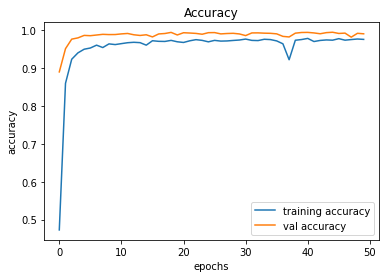

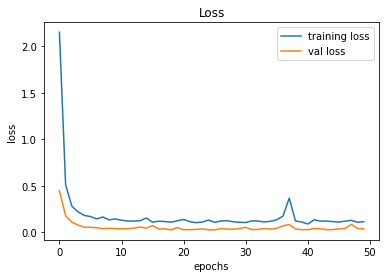

In [8]:
    print("Training under process...")
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu', input_shape=X_train.shape[1:]))
    model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(rate=0.25))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(rate=0.25))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(rate=0.5))
    model.add(Dense(43, activation='softmax'))
    print("Initialized model")

    # Compilation of the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


    history = model.fit(X_train, y_train, batch_size=64, epochs=50, validation_data=(X_test, y_test))
    model.save("my_model.h5")

    plt.figure(0)
    plt.plot(history.history['accuracy'], label='training accuracy')
    plt.plot(history.history['val_accuracy'], label='val accuracy')
    plt.title('Accuracy')
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.legend()
    plt.savefig('Accuracy.png')

    plt.figure(1)
    plt.plot(history.history['loss'], label='training loss')
    plt.plot(history.history['val_loss'], label='val loss')
    plt.title('Loss')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.legend()
    plt.savefig('Loss.png')
    print("Saved Model & Graph to disk")